<a href="https://colab.research.google.com/github/metsumesquita/master_degree_UPE/blob/main/Hybrid_Model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#instalações e importações

In [6]:
pip install statsforecast

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as ks
import tensorflow as tf
import statsmodels.api as sm
import yfinance as yf
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import pandas as pd
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

#carregamento dos conjuntos

In [8]:
url_1 = "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/sunspot.csv"
sunpot_data = pd.read_csv(url_1)

url_2= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE//main/Datasets/US-UK.csv"
exchange_data= pd.read_csv(url_2)

url_3= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/lynx.csv"
lynx_data= pd.read_csv(url_3)

url_4= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/nikkei225.csv"
nikkei225_data= pd.read_csv(url_4)

#lynx
####the Canadian lynx annual record of the number of Canadian lynx from 1821 to 1934

In [9]:
#lynx
lynx_data.head()

,year,value
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475


In [10]:
lynx_data.tail()

,year,value
109,1930,662
110,1931,1000
111,1932,1590
112,1933,2657
113,1934,3396


In [11]:
lynx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    114 non-null    int64
 1   value   114 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [12]:
print(lynx_data.index)
print(type(lynx_data.index))

RangeIndex(start=0, stop=114, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [13]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
lynx_data["year"] = pd.to_datetime(lynx_data["year"], format="%Y")

# Definir 'year' como índice
lynx_data.set_index("year", inplace=True)

# Se o índice for do tipo PeriodIndex, converta para Timestamp
if isinstance(lynx_data.index, pd.PeriodIndex):
    lynx_data.index = lynx_data.index.to_timestamp()


In [14]:

# Ordenar os dados por data (boa prática)
lynx_data=lynx_data.sort_index()

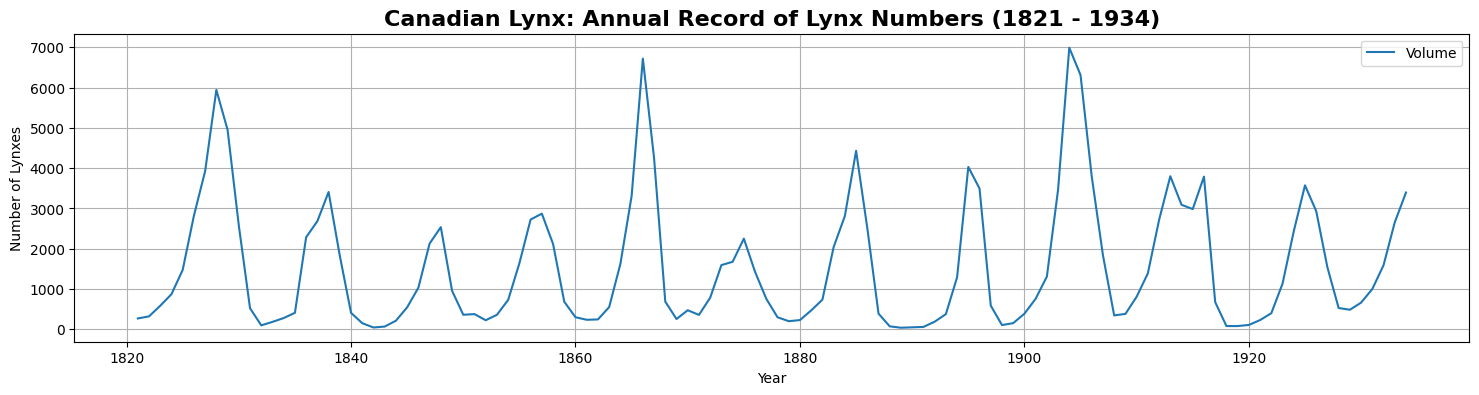

In [15]:
plt.figure(figsize=(18, 4))
plt.plot(lynx_data.index, lynx_data["value"], label='Volume') # Capitalized 'Volume' for consistency

plt.title("Canadian Lynx: Annual Record of Lynx Numbers (1821 - 1934)", fontsize=16, fontweight='bold')

plt.xlabel("Year")
plt.ylabel("Number of Lynxes") # More specific label
plt.grid(True)
plt.legend()
plt.show()

#sunpot
####The sunspot data considered in this paper include the annual number ofsunspot from 1700 to 1987

In [16]:
#sunpot
print("primeiros anos registrados")
sunpot_data.head()

primeiros anos registrados


,year,value
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


In [17]:
print("ultimos anos registrados")
sunpot_data.tail()

ultimos anos registrados


,year,value
284,1984,45.9
285,1985,17.9
286,1986,13.4
287,1987,29.2
288,1988,100.2


In [18]:
sunpot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    289 non-null    int64  
 1   value   289 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.6 KB


In [19]:
print(sunpot_data.index)
print(type(sunpot_data.index))

RangeIndex(start=0, stop=289, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [20]:
# Converter a coluna 'year' para datetime no formato de ano
sunpot_data["year"] = pd.to_datetime(sunpot_data["year"], format="%Y", errors='coerce')

# Definir 'year' como índice
sunpot_data.set_index("year", inplace=True)

# Garantir que o índice seja datetime (Timestamp), não Period
if isinstance(sunpot_data.index, pd.PeriodIndex):
    sunpot_data.index = sunpot_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
sunpot_data = sunpot_data.sort_index()


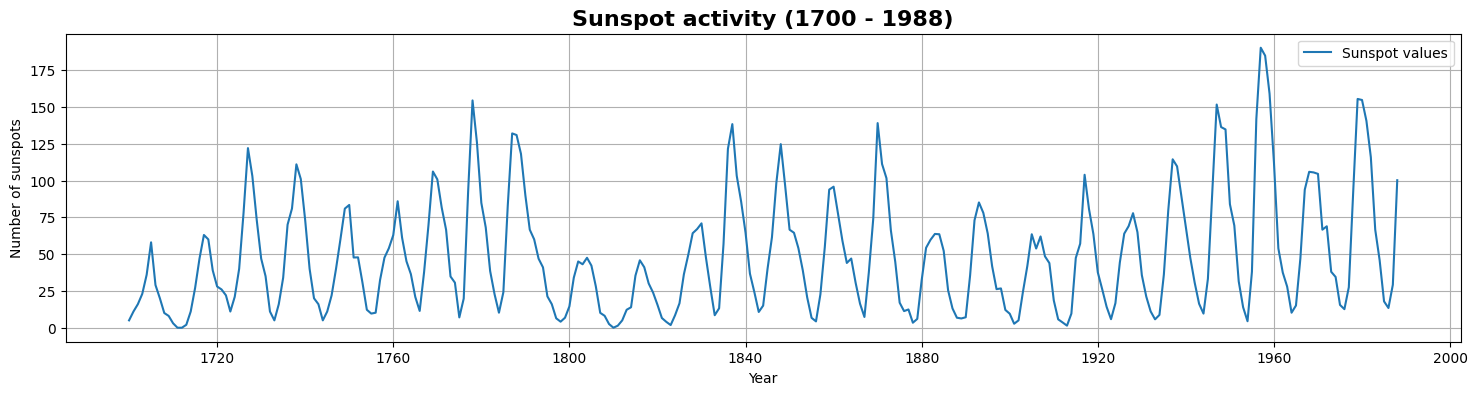

In [21]:
plt.figure(figsize=(18, 4)) # Create the first figure
plt.plot(sunpot_data.index, sunpot_data["value"], label='Sunspot values') # Plot sunspot data

# Correct title for the sunspot plot
plt.title("Sunspot activity (1700 - 1988)", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of sunspots") # Corrected label
plt.grid(True)
plt.legend()
plt.show() # Display the first plot


#exchange rate
####The exchange rate data set used in this paper contains weekly observations from 1980 to 1993

In [55]:
exchange_data.head()

,DEXUSUK
observation_date,
1980-01-05,2.2370
1980-01-12,2.2570
1980-01-19,2.2855
1980-01-26,2.2610
1980-02-02,2.2740


In [56]:

exchange_data.tail()

,DEXUSUK
observation_date,
1993-11-27,1.4795
1993-12-04,1.4900
1993-12-11,1.4945
1993-12-18,1.4910
1993-12-25,1.5030


In [57]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 1980-01-05 to 1993-12-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXUSUK  730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [58]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#weekly observations from 1980 to 1993
exchange_data["observation_date"] = pd.to_datetime(exchange_data["observation_date"])
exchange_data.set_index("observation_date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(exchange_data.index, pd.PeriodIndex):
    exchange_data.index = exchange_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
exchange_data = exchange_data.sort_index()

KeyError: 'observation_date'

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(exchange_data.index, exchange_data["DEXUSUK"], label='DEXUSUK') # Plot the actual data

plt.title("DEXUSUK: Weekly Exchange Rate (1980 - 1993)", fontsize=16, fontweight='bold') # Correct title placement
plt.xlabel("Year") # Appropriate label for time series
plt.ylabel("Exchange Rate") # Correct label for exchange rate
plt.grid(True)
plt.legend() # Show the label 'DEXUSUK'
plt.show()

#nikkie225
>
The closing Nikkei 225 index (N225) data set covers daily stock
prices from 2006/03/03 to 2010/04/01

In [27]:
nikkei225_data.tail()

,date,value
995,2010-03-26,10996.370117
996,2010-03-29,10986.469727
997,2010-03-30,11097.139648
998,2010-03-31,11089.940430
999,2010-04-01,11244.400391


In [28]:
nikkei225_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1000 non-null   object 
 1   value   1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [29]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#2006/03/03 to 2009/06/05
nikkei225_data["date"] = pd.to_datetime(nikkei225_data["date"])
nikkei225_data.set_index("date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(nikkei225_data.index, pd.PeriodIndex):
    nikkei225_data.index = nikkei225_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
nikkei225_data =nikkei225_data.sort_index()

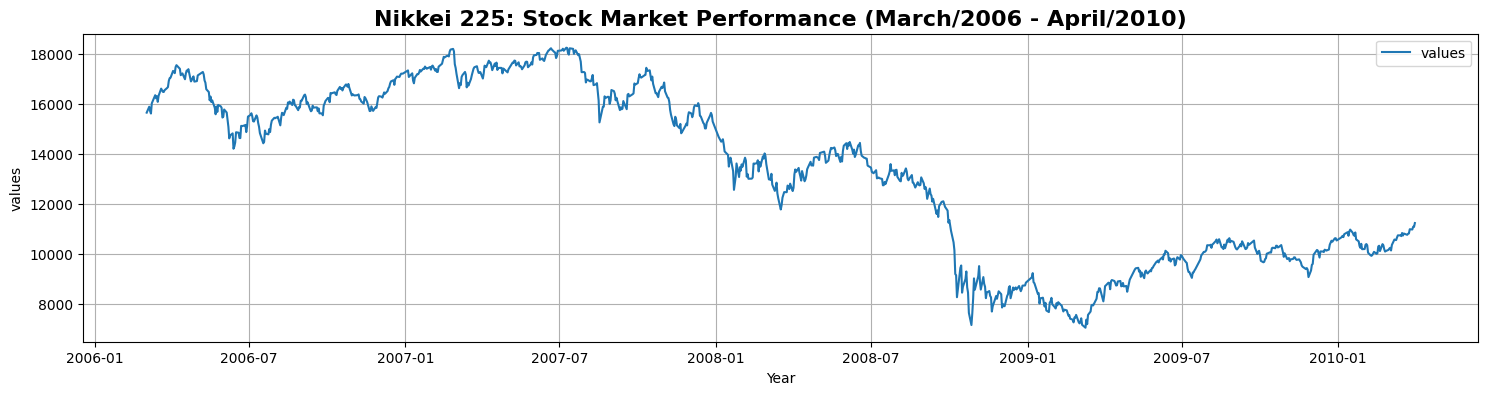

In [30]:
plt.figure(figsize=(18, 4))
plt.plot(nikkei225_data.index, nikkei225_data["value"], label='values')

# --- Here's the improved title setup ---
plt.title("Nikkei 225: Stock Market Performance (March/2006 - April/2010)", fontsize=16, fontweight='bold')
# --- End of improved title setup ---

plt.xlabel("Year") # Changed to "Ano" for Portuguese
plt.ylabel("values")
plt.grid(True)
plt.legend() # Don't forget to add legend if you have labels
plt.show()

#acf antes pacf

In [31]:
#need to be in ingles
def gerar_graficos_temporais(df, titulo):
    import pandas as pd
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    import matplotlib.pyplot as plt

    col = df.columns[0]
    serie = df[col].dropna()


    # Inferência da frequência
    freq = pd.infer_freq(df.index)
    print(f"[INFO] Plotando série: {col} — Frequência inferida: {freq}")

    # Escolha inteligente de reamostragem
    if freq in ['D', 'B', 'W', None]:
        serie_agg = serie.resample('ME').mean()
        agg_label = 'Média Mensal'
    elif freq in ['A', 'AS', 'Y']:
        serie_agg = serie.resample('2A').mean()
        agg_label = 'Média Bienal'
    elif freq in ['M', 'MS']:
        serie_agg = serie  # Já está em base mensal
        agg_label = 'Série Original (Mensal)'
    else:
        serie_agg = serie
        agg_label = 'Série Original'

    # Número seguro de defasagens
    lags = min(20, len(serie) // 2)

    # Gráficos
    plt.figure(figsize=(12, 10))

    # 1. Série original
    plt.subplot(4, 1, 1)
    plt.plot(serie, color='blue')
    plt.title(f'{titulo} - Série Original')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 2. Série reamostrada
    plt.subplot(4, 1, 2)
    plt.plot(serie_agg, color='green')
    plt.title(f'{titulo} - {agg_label}')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 3. ACF
    plt.subplot(4, 1, 3)
    plot_acf(serie, lags=lags, ax=plt.gca())
    plt.title(f'{titulo} - Autocorrelação (ACF)')
    plt.grid(True)

    # 4. PACF
    plt.subplot(4, 1, 4)
    plot_pacf(serie, lags=lags, ax=plt.gca(), method='ywm')
    plt.title(f'{titulo} - Autocorrelação Parcial (PACF)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


[INFO] Plotando série: value — Frequência inferida: YS-JAN


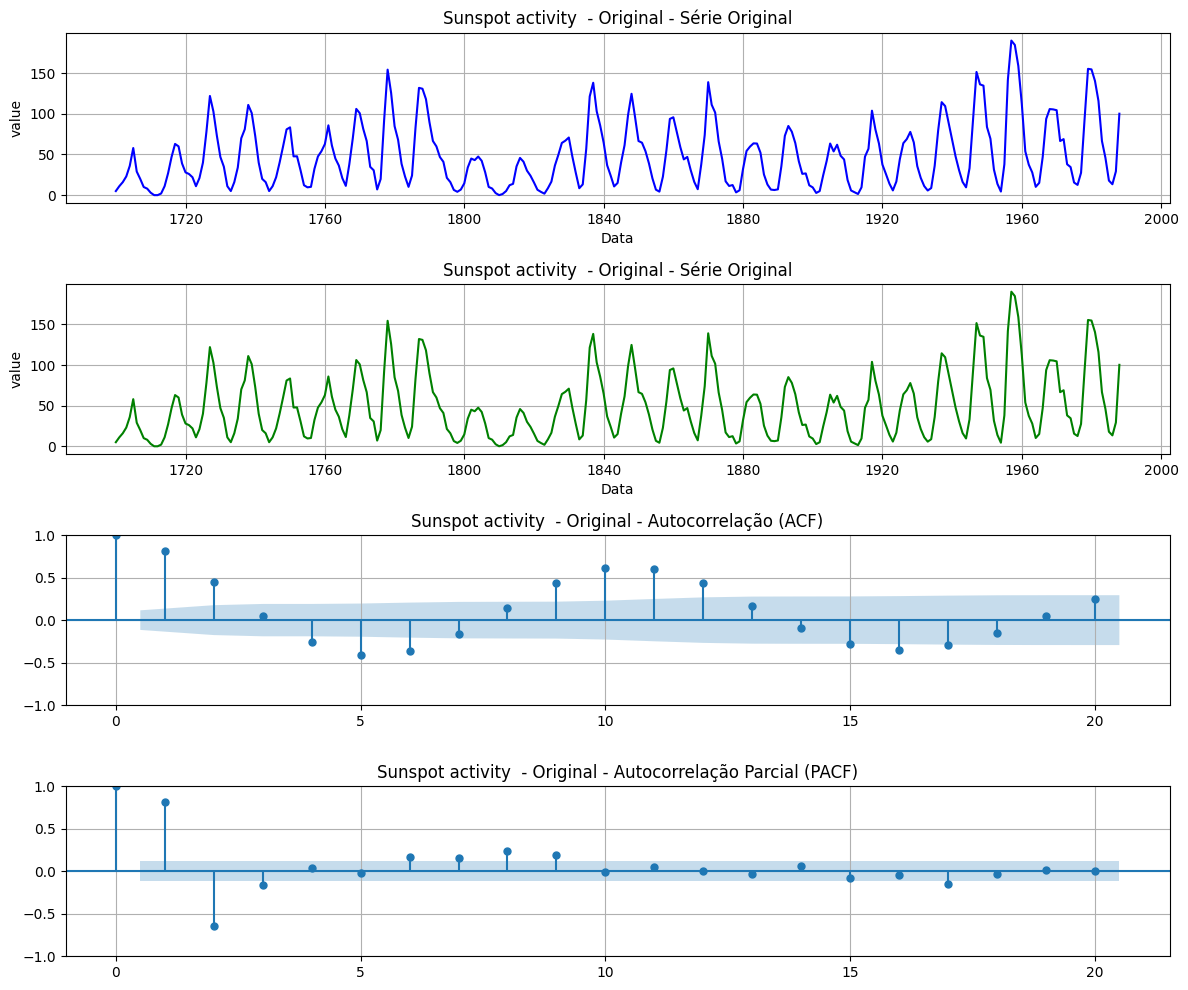

In [32]:
gerar_graficos_temporais(sunpot_data, "Sunspot activity  - Original")

[INFO] Plotando série: value — Frequência inferida: YS-JAN


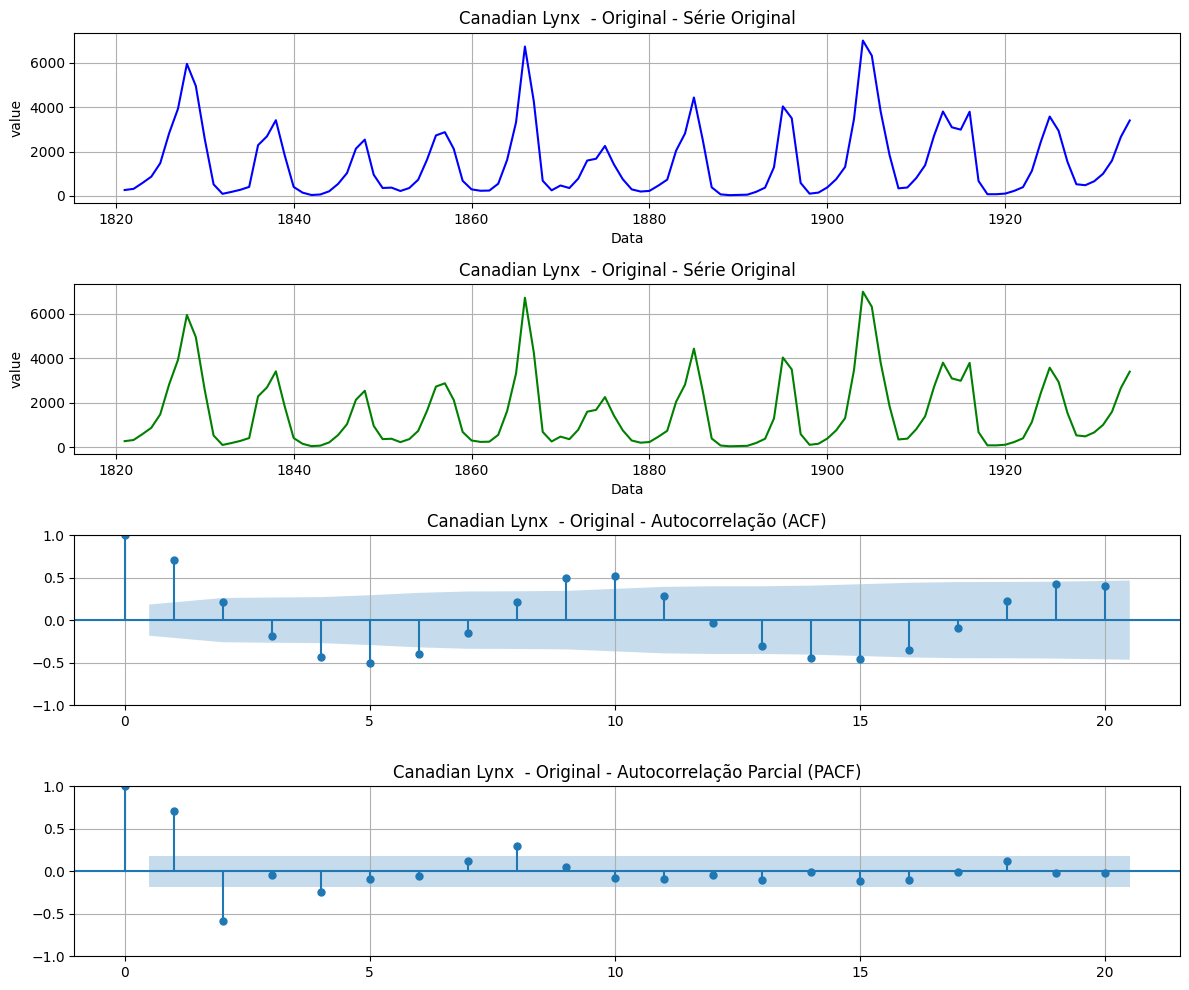

In [33]:
gerar_graficos_temporais(lynx_data, "Canadian Lynx  - Original")

[INFO] Plotando série: DEXUSUK — Frequência inferida: W-SAT


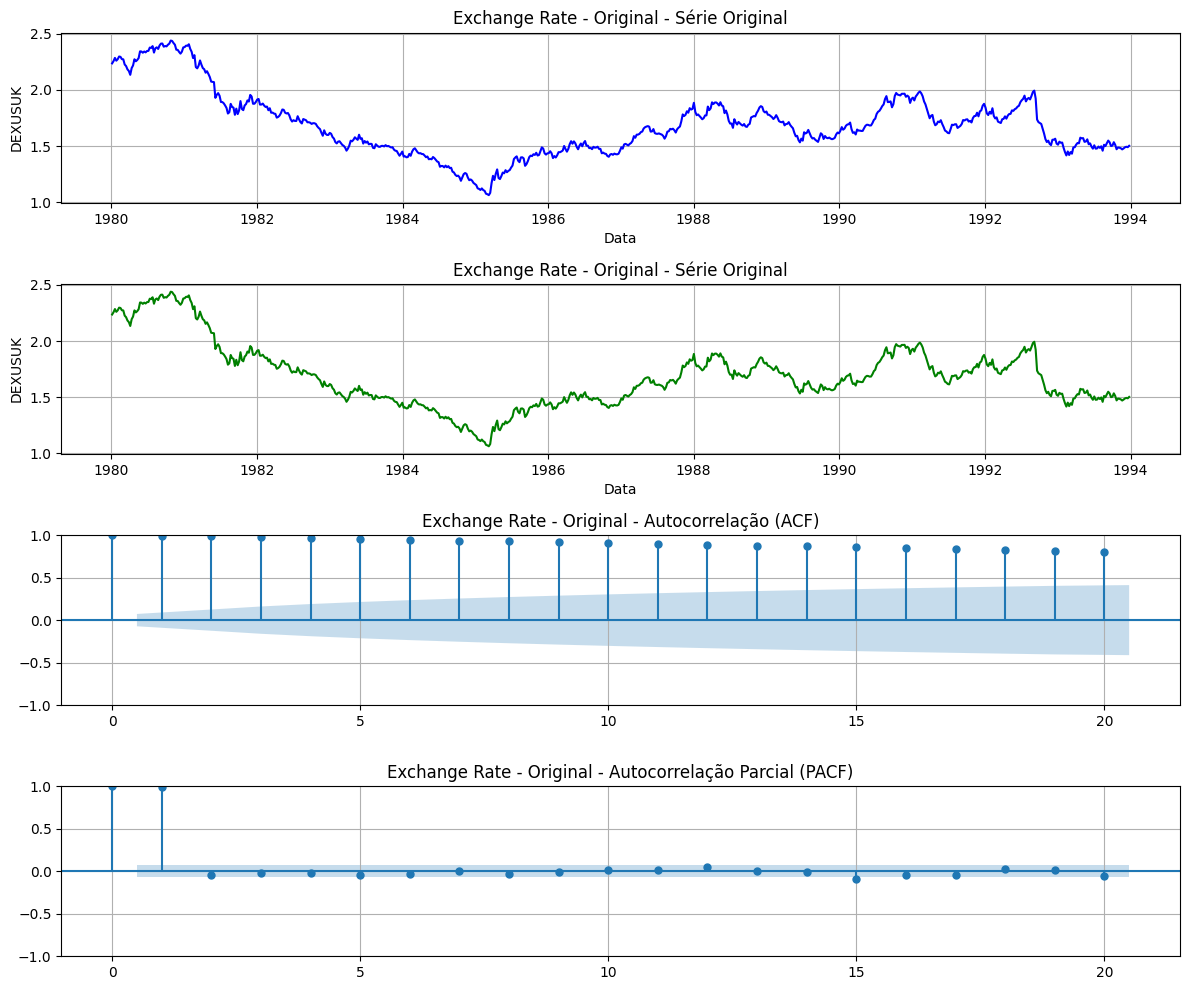

In [34]:
gerar_graficos_temporais(exchange_data, "Exchange Rate - Original")


[INFO] Plotando série: value — Frequência inferida: None


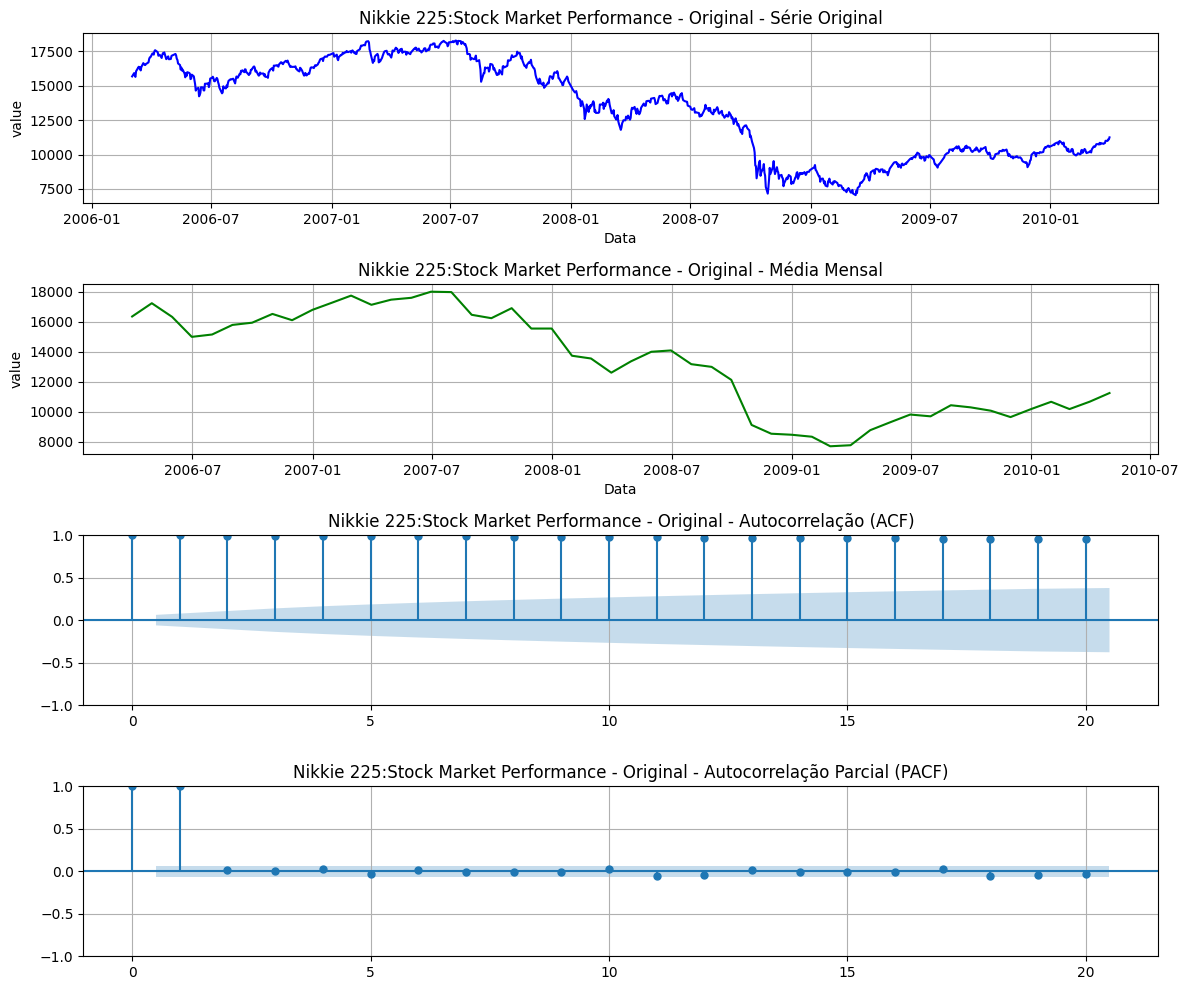

In [35]:
gerar_graficos_temporais(nikkei225_data, "Nikkie 225:Stock Market Performance - Original")

#decomposição


📊 Performing Seasonal Decomposition for 'Exchange Rate' (Column: DEXUSUK, Period: 7)


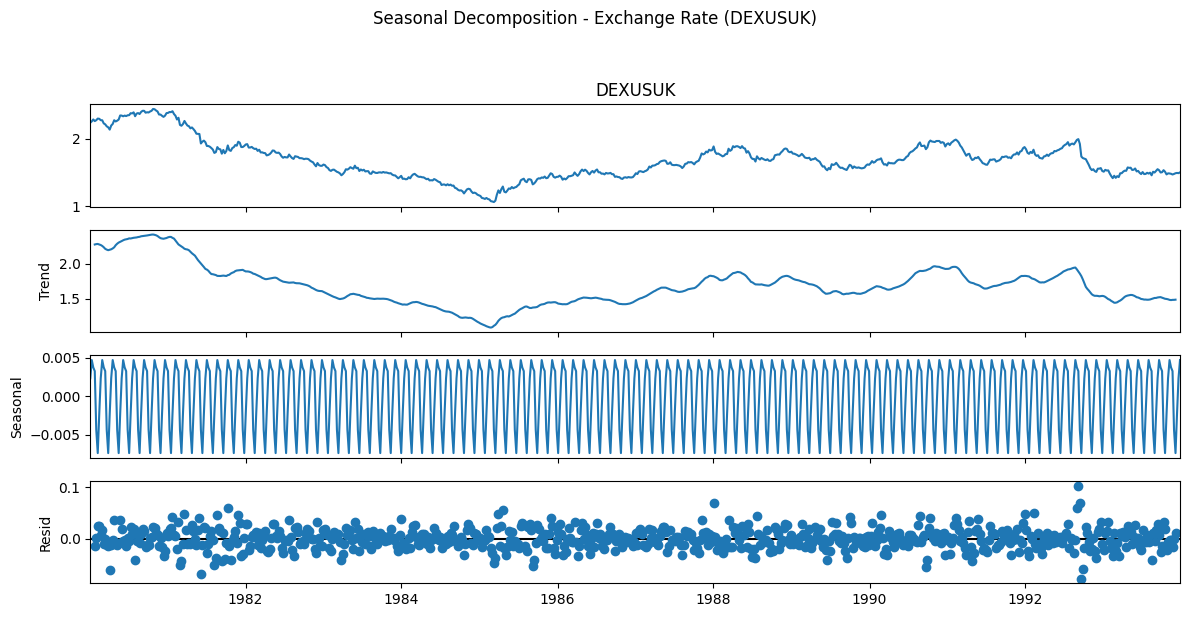


📊 Performing Seasonal Decomposition for 'Sunspot Activity' (Column: value, Period: 10)


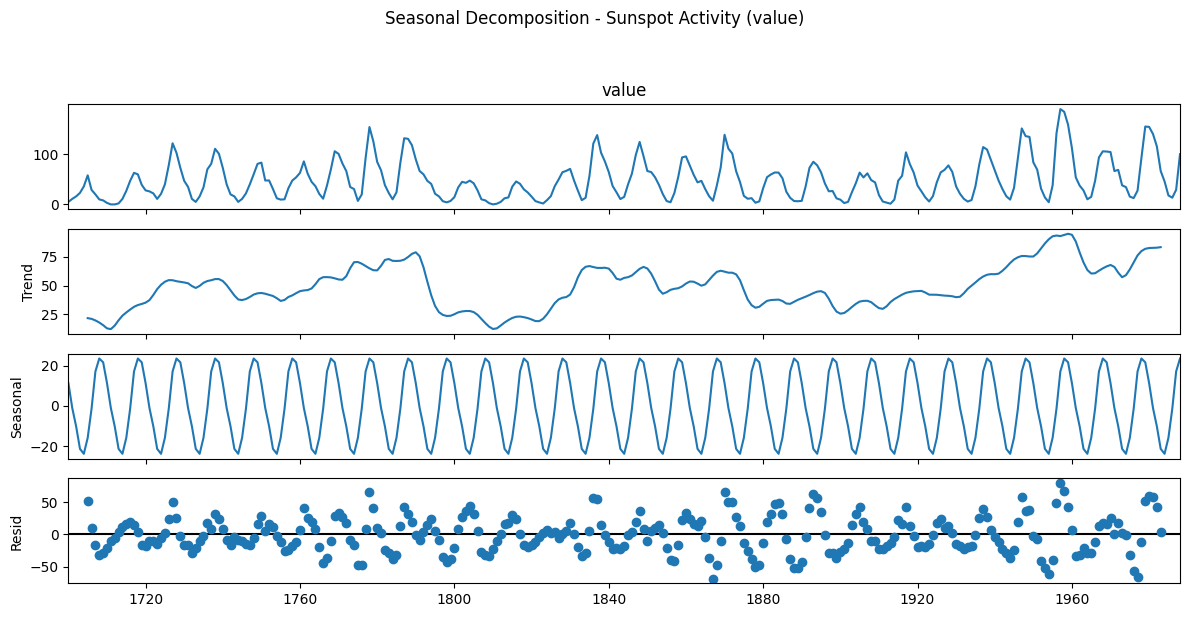


📊 Performing Seasonal Decomposition for 'Lynx Trappings' (Column: value, Period: 10)


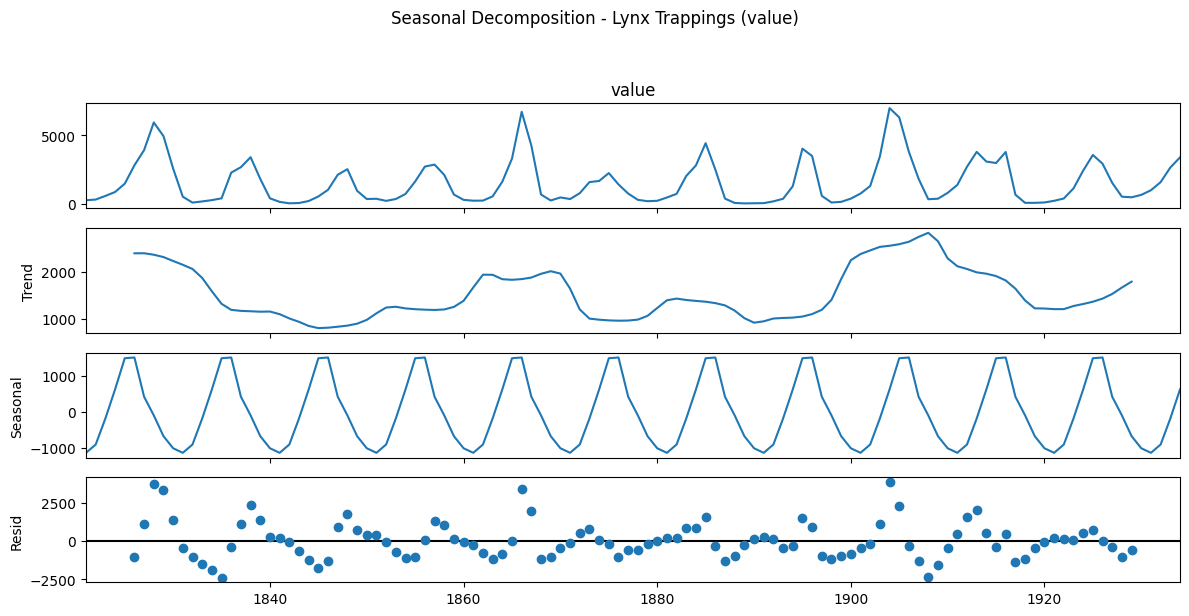


📊 Performing Seasonal Decomposition for 'Nikkei 225' (Column: value, Period: 365)


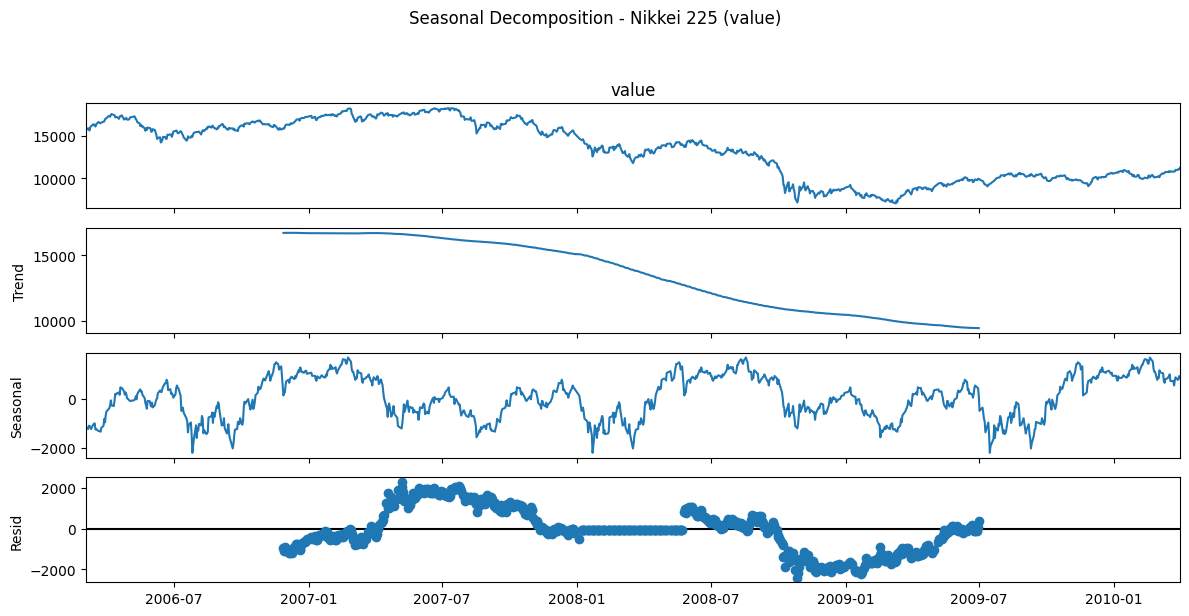

In [59]:
data_to_analyze = [
    # Weekly data, so a 7-day period (weekly cycle) is appropriate.
    {"name": "Exchange Rate", "df": exchange_data, "value_col": "DEXUSUK", "seasonal_period": 7},

    {"name": "Sunspot Activity", "df": sunpot_data, "value_col": "value", "seasonal_period": 10},

    {"name": "Lynx Trappings", "df": lynx_data, "value_col": "value", "seasonal_period": 10},

##The closing Nikkei 225 index (N225) data set covers daily stock#prices from 2006/03/03 to 2010/04/01
    # Daily data. Common periodicities are 5 (trading week), 7 (calendar week), or 365 (yearly).
    {"name": "Nikkei 225", "df": nikkei225_data, "value_col": "value", "seasonal_period": 365} # Trading week seasonality
]

# (Your `testar_season_decomp` function code remains the same as provided in your prompt)
def testar_season_decomp(data_configurations: list):
    """
    Performs seasonal decomposition for multiple time series and plots the components.

    Args:
        data_configurations (list): A list of dictionaries, where each dictionary should contain:
                                    - "name" (str): A descriptive name for the series.
                                    - "df" (pd.DataFrame): The DataFrame containing the time series.
                                    - "value_col" (str): The name of the column to analyze.
                                    - "seasonal_period" (int): The period of the seasonality
                                                               (e.g., 12 for monthly, 7 for weekly).
                                                               If None, decomposition is skipped for that series.
    """
    for config in data_configurations:
        name = config.get("name")
        df = config.get("df")
        value_col = config.get("value_col")
        period = config.get("seasonal_period")

        if not all([name, isinstance(df, pd.DataFrame), value_col]):
            print(f"Skipping invalid configuration: {config}. Missing name, DataFrame, or value_col.")
            continue

        if value_col not in df.columns:
            print(f"Error: Column '{value_col}' not found in DataFrame for '{name}'. Skipping.")
            continue

        serie = df[value_col].dropna()

        if period is None:
            print(f"\n🚫 Skipping seasonal decomposition for '{name}' (Column: {value_col}): No seasonal period specified.")
            continue

        # seasonal_decompose requires at least two full periods to work correctly
        if len(serie) < 2 * period:
            print(f"\n⚠️ Skipping seasonal decomposition for '{name}' (Column: {value_col}): Not enough data for period={period} (need at least {2*period} observations).")
            continue

        print(f"\n📊 Performing Seasonal Decomposition for '{name}' (Column: {value_col}, Period: {period})")

        try:
            # Model='additive' is suitable when seasonal fluctuations are roughly constant.
            # Model='multiplicative' is suitable when seasonal fluctuations grow/shrink with the level of the series.
            # Choose the model appropriate for your data.
            decomposicao = seasonal_decompose(serie, model='additive', period=period)

            # Plot the components
            fig = decomposicao.plot()
            fig.set_size_inches(12, 6) # Make the plot a bit larger for readability
            plt.suptitle(f"Seasonal Decomposition - {name} ({value_col})", y=1.02)
            plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
            plt.show()
        except Exception as e:
            print(f"An error occurred during decomposition for '{name}': {e}")

            # Define o nome do arquivo, combinando o nome da série e a coluna
            filename = f"decomposicao_{name.replace(' ', '_').replace('/', '_')}_{value_col}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"Gráfico salvo como: {filename}")



# --- Call the function with your data ---
if __name__ == "__main__":
    testar_season_decomp(data_configurations=data_to_analyze)

#estacionalidade para todo os conjuntos


In [60]:
#need to chance to ingles
def tornar_estacionaria(df, nome="Série", max_diff=3):
    col_name = df.columns[0]
    current_serie = df[col_name].dropna().copy()
    differentiated_order = 0  # contador de quantas vezes foi diferenciada

    print(f"\n📊 Análise de Estacionaridade - {nome}")
    print(f"Coluna analisada: {col_name}")

    # --- Teste ADF na série original ---
    adf_result = adfuller(current_serie)
    print(f"\n🔍 Série Original:")
    print(f"  ADF Statistic: {adf_result[0]:.4f}")
    print(f"  p-value: {adf_result[1]:.4f}")
    print(f"  Valores Críticos: {adf_result[4]}")

    if adf_result[1] < 0.05:
        print("  ✅ A série é estacionária. Nenhuma diferenciação necessária.")
        return df.loc[current_serie.index]  # retorna a série original (sem diferenciação)

    print("  ❌ A série NÃO é estacionária. Tentando diferenciações...")

    # --- Diferenciação sucessiva ---
    for d in range(1, max_diff + 1):
        if len(current_serie) > 1:
            current_serie = current_serie.diff().dropna()
        else:
            print(f"  ⚠️ Série muito curta para diferenciar após {d-1} diferenciações.")
            break

        if len(current_serie) == 0:
            print(f"  ⚠️ Série vazia após {d} diferenciações. Não é possível testar.")
            break

        adf_diff = adfuller(current_serie)
        print(f"\n🔁 Série Diferenciada ({d}ª ordem):")
        print(f"  ADF Statistic: {adf_diff[0]:.4f}")
        print(f"  p-value: {adf_diff[1]:.4f}")
        print(f"  Valores Críticos: {adf_diff[4]}")

        if adf_diff[1] < 0.05:
            print(f"  ✅ A série diferenciada ({d}ª ordem) é estacionária.")
            differentiated_order = d
            break
        else:
            print(f"  ❌ Ainda NÃO é estacionária.")

    # --- Informativo final ---
    if differentiated_order > 0:
        print(f"✔️ A série '{nome}' foi diferenciada {differentiated_order} vez(es).")
    else:
        print(f"⚠️ A série '{nome}' NÃO estacionarizou após {max_diff} diferenciações.")

    # --- Retorna o DataFrame atualizado com a série transformada ---
    return pd.DataFrame({col_name: current_serie})


In [61]:
exchange_data_est = tornar_estacionaria(exchange_data, "Exchange Rate")
sunspot_data_est = tornar_estacionaria(sunpot_data, "Sunspot")
lynx_data_est = tornar_estacionaria(lynx_data, "Lynx Trappings")
nikkei_data_est = tornar_estacionaria(nikkei225_data, "Nikkei 225")


📊 Análise de Estacionaridade - Exchange Rate
Coluna analisada: DEXUSUK

🔍 Série Original:
  ADF Statistic: -1.9903
  p-value: 0.2908
  Valores Críticos: {'1%': np.float64(-3.4393520240470554), '5%': np.float64(-2.8655128165959236), '10%': np.float64(-2.5688855736949163)}
  ❌ A série NÃO é estacionária. Tentando diferenciações...

🔁 Série Diferenciada (1ª ordem):
  ADF Statistic: -26.1380
  p-value: 0.0000
  Valores Críticos: {'1%': np.float64(-3.4393644334758475), '5%': np.float64(-2.8655182850048306), '10%': np.float64(-2.568888486973192)}
  ✅ A série diferenciada (1ª ordem) é estacionária.
✔️ A série 'Exchange Rate' foi diferenciada 1 vez(es).

📊 Análise de Estacionaridade - Sunspot
Coluna analisada: value

🔍 Série Original:
  ADF Statistic: -2.3842
  p-value: 0.1462
  Valores Críticos: {'1%': np.float64(-3.453922368485787), '5%': np.float64(-2.871918329081633), '10%': np.float64(-2.5723001147959184)}
  ❌ A série NÃO é estacionária. Tentando diferenciações...

🔁 Série Diferenciada (

#comparando a serie antes e depois de sofrer diferenciação - grafico

In [62]:
#needs to be chance to ingles
def compare_series(serie_original, serie_transformada, titulo='Comparação de Séries Temporais'):
    plt.figure(figsize=(14, 6))

    # Série original
    plt.subplot(2, 1, 1)
    plt.plot(serie_original, color='blue')
    plt.title(f'{titulo} - Série Original')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.grid(True)

    # Série transformada (ex: após diferenciação)
    plt.subplot(2, 1, 2)
    plt.plot(serie_transformada, color='green')
    plt.title(f'{titulo} - Série Após Diferenciação')
    plt.xlabel('Data')
    plt.ylabel('Valor Transformado')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


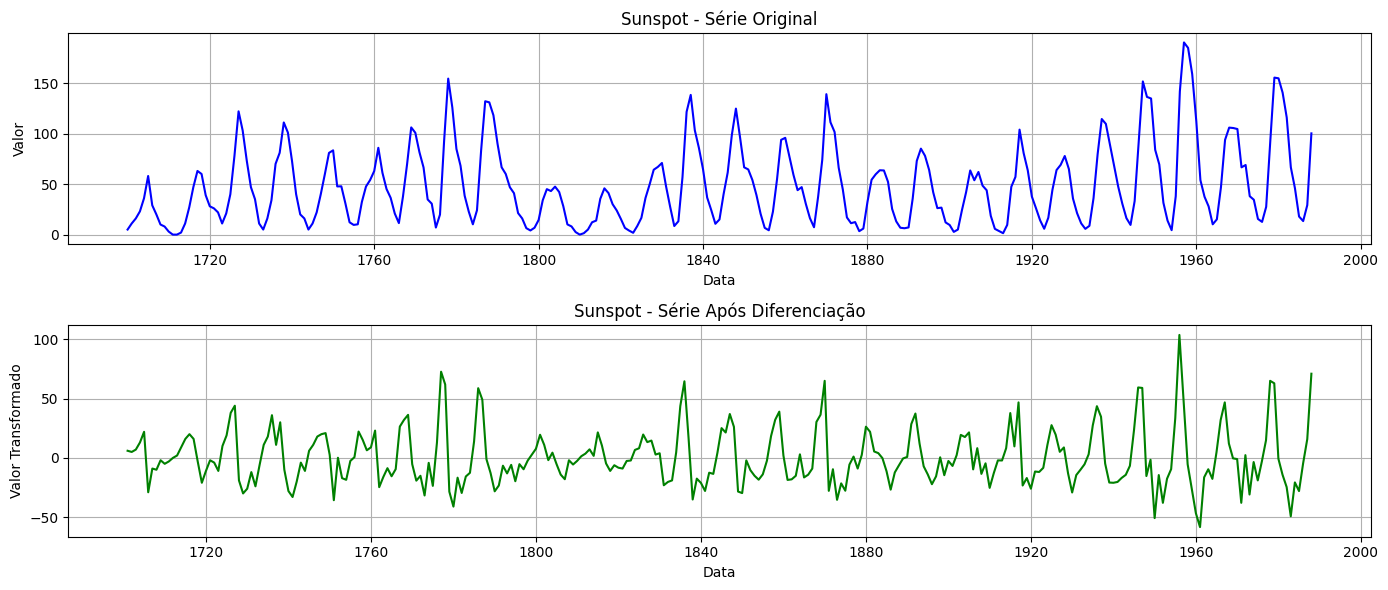

In [63]:
compare_series(sunpot_data,sunspot_data_est,"Sunspot")

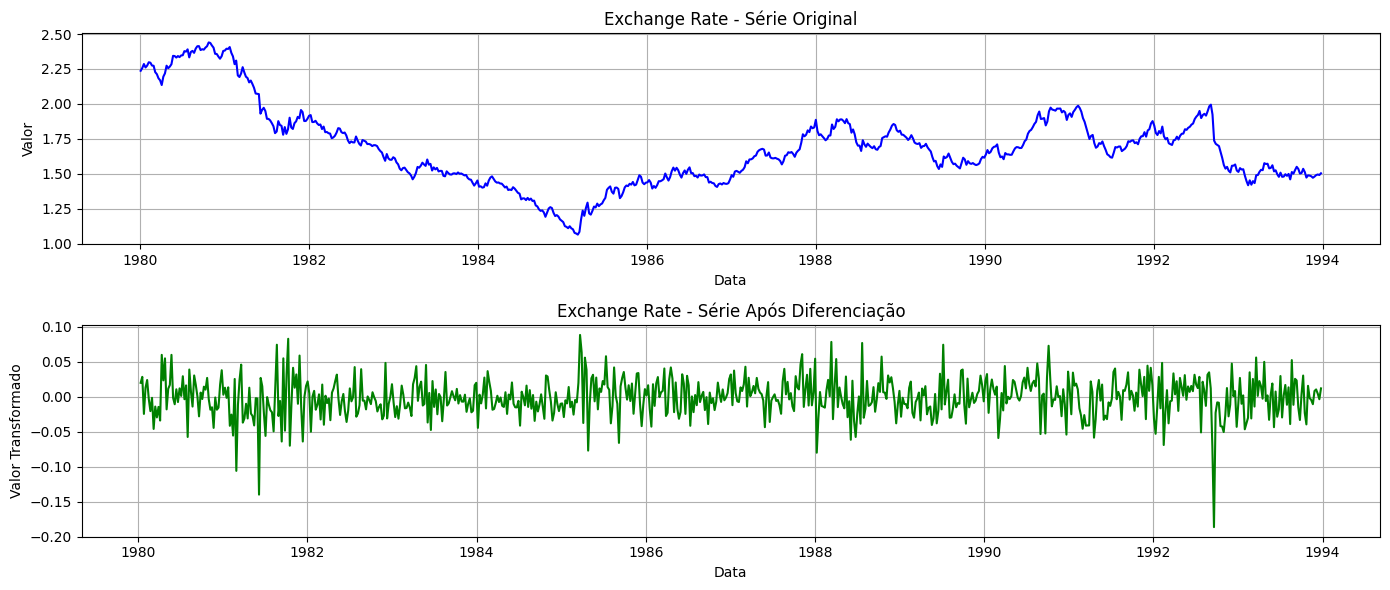

In [64]:
compare_series(exchange_data,exchange_data_est,"Exchange Rate")

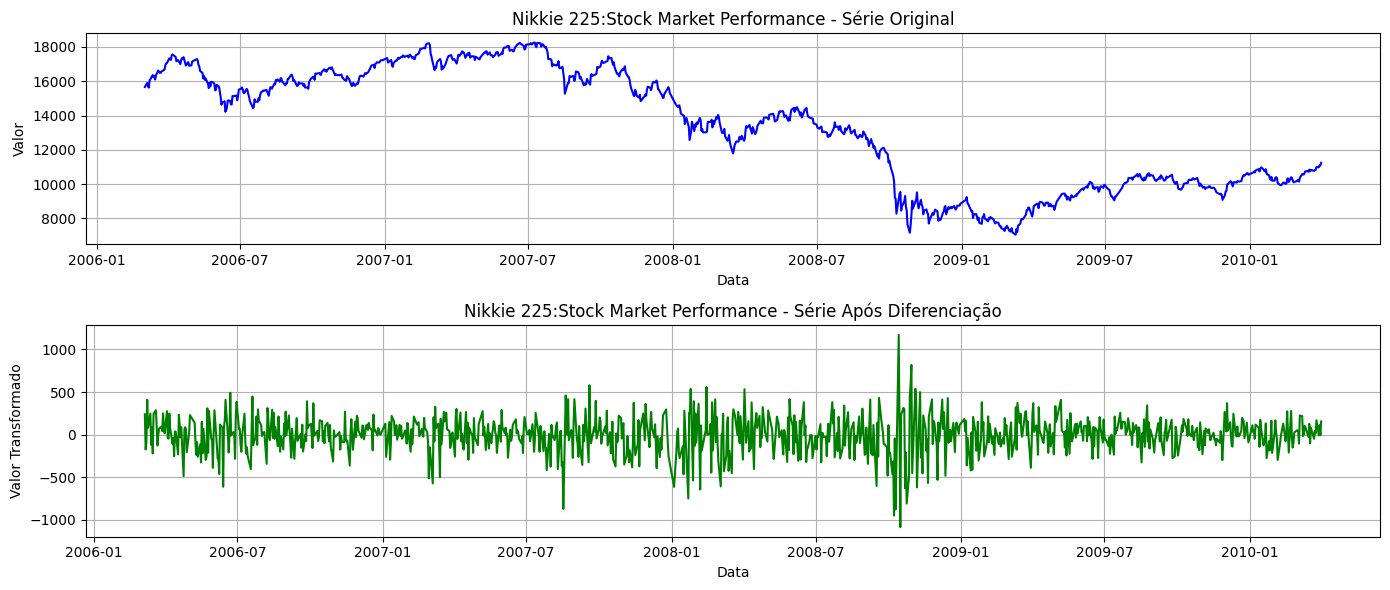

In [65]:
compare_series(nikkei225_data,nikkei_data_est ,"Nikkie 225:Stock Market Performance")

#compare acf and pacf after and before

In [66]:
def compare_series_acf_pacf(original_series, stationary_series, series_name, max_lags=40):
    """
    Plots and compares the ACF and PACF for an original time series and its stationary version.

    Args:
        original_series (pd.Series): The original time series.
        stationary_series (pd.Series): The stationary version of the time series (e.g., after differentiation).
        series_name (str): The name of the series for plot titles.
        max_lags (int): The maximum number of lags to display in the ACF/PACF plots.
                        Will be capped by the length of the series.
    """
    # Ensure inputs are pandas Series and drop NaNs if any
    original_series = original_series.squeeze().dropna()
    stationary_series = stationary_series.squeeze().dropna()

    # Calculate effective max_lags
    lags_original = min(max_lags, len(original_series) - 1)
    lags_stationary = min(max_lags, len(stationary_series) - 1)

    # Create a figure and a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'ACF and PACF Comparison for {series_name}', fontsize=16)

    # --- Row 1: Original Series ---
    # Plot ACF for Original Series
    plot_acf(original_series, ax=axes[0, 0], lags=lags_original)
    axes[0, 0].set_title(f'ACF - {series_name} (Original)')
    axes[0, 0].grid(True)

    # Plot PACF for Original Series
    plot_pacf(original_series, ax=axes[0, 1], lags=lags_original, method='ywm')
    axes[0, 1].set_title(f'PACF - {series_name} (Original)')
    axes[0, 1].grid(True)

    # --- Row 2: Stationary Series ---
    # Plot ACF for Stationary Series
    plot_acf(stationary_series, ax=axes[1, 0], lags=lags_stationary)
    axes[1, 0].set_title(f'ACF - {series_name} (After Differentiation)')
    axes[1, 0].grid(True)

    # Plot PACF for Stationary Series
    plot_pacf(stationary_series, ax=axes[1, 1], lags=lags_stationary, method='ywm')
    axes[1, 1].set_title(f'PACF - {series_name} (After Differentiation)')
    axes[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout, leaving space for suptitle
    plt.show()


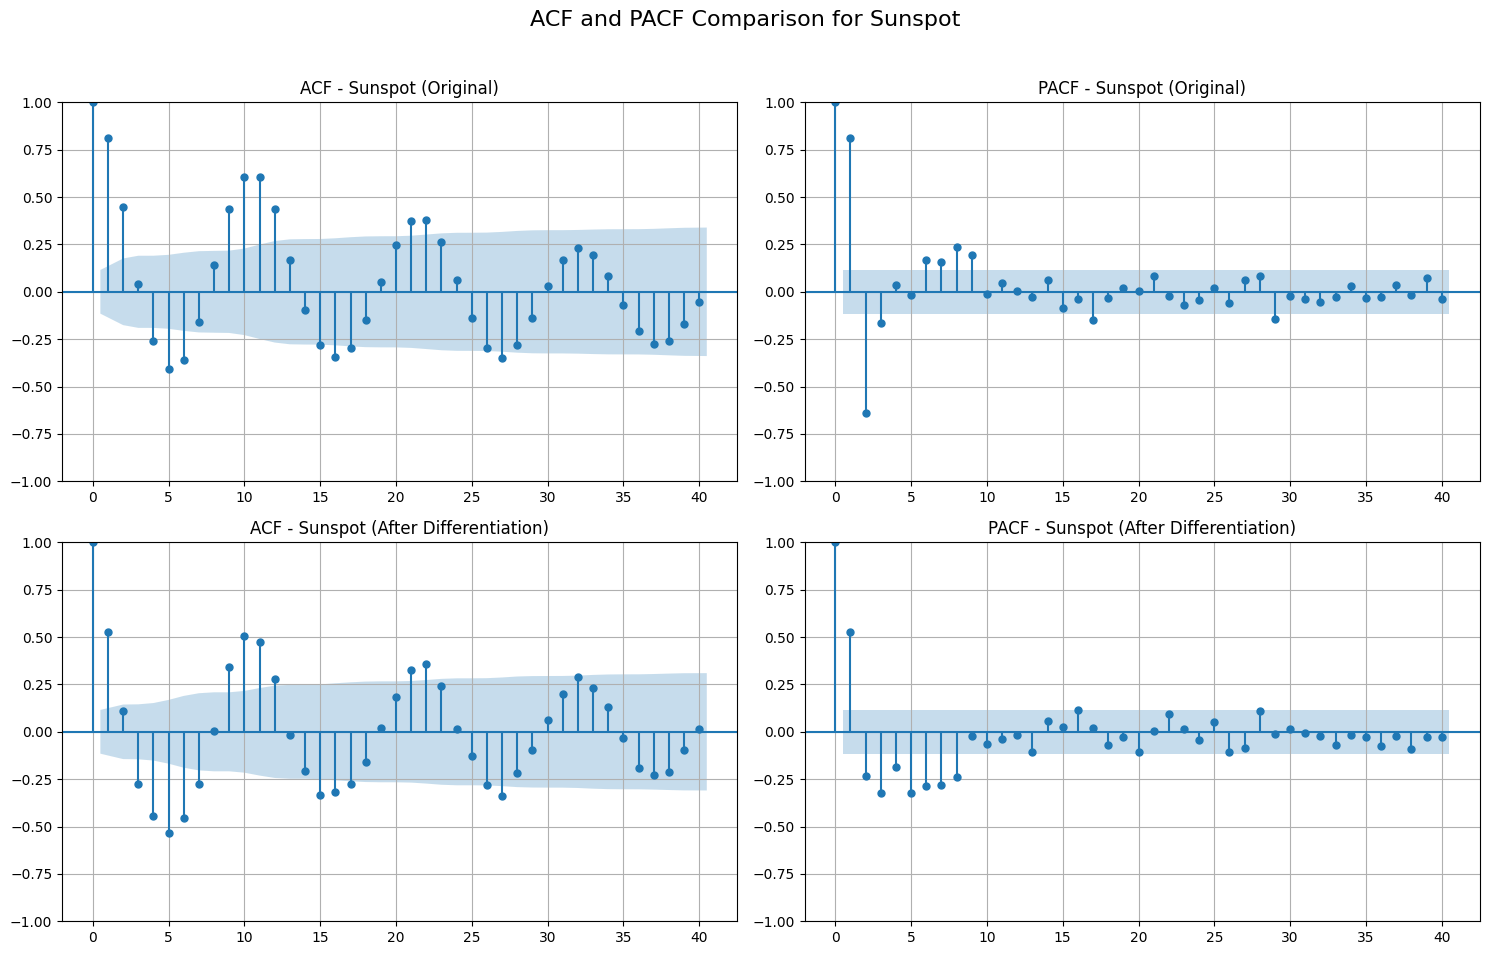

In [67]:
compare_series_acf_pacf(sunpot_data,sunspot_data_est,"Sunspot")

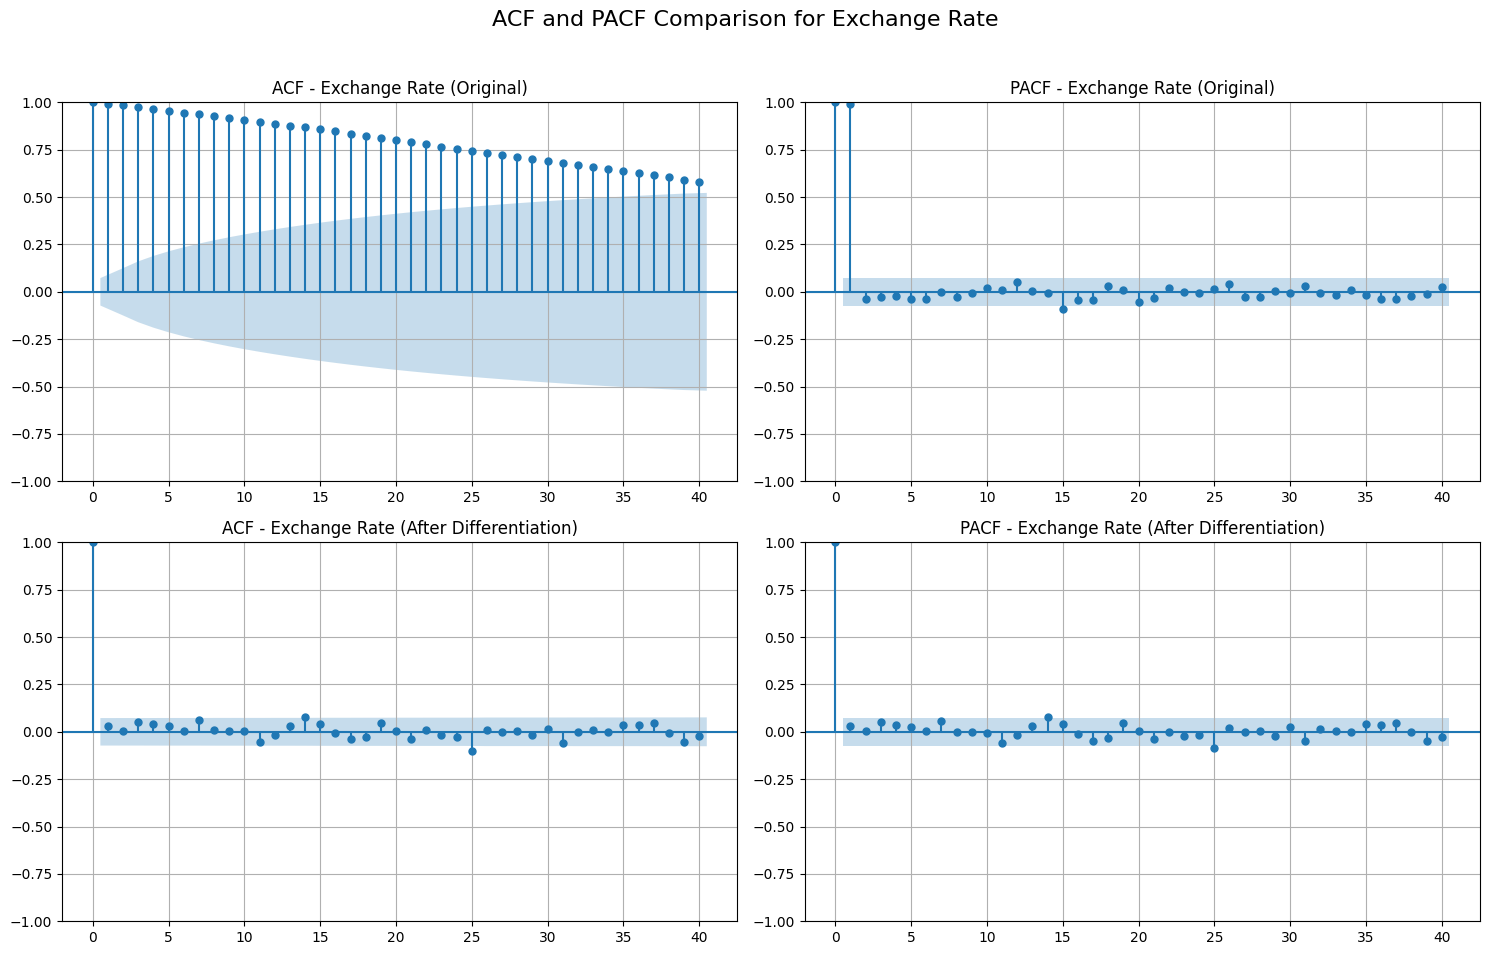

In [68]:
compare_series_acf_pacf(exchange_data,exchange_data_est,"Exchange Rate")

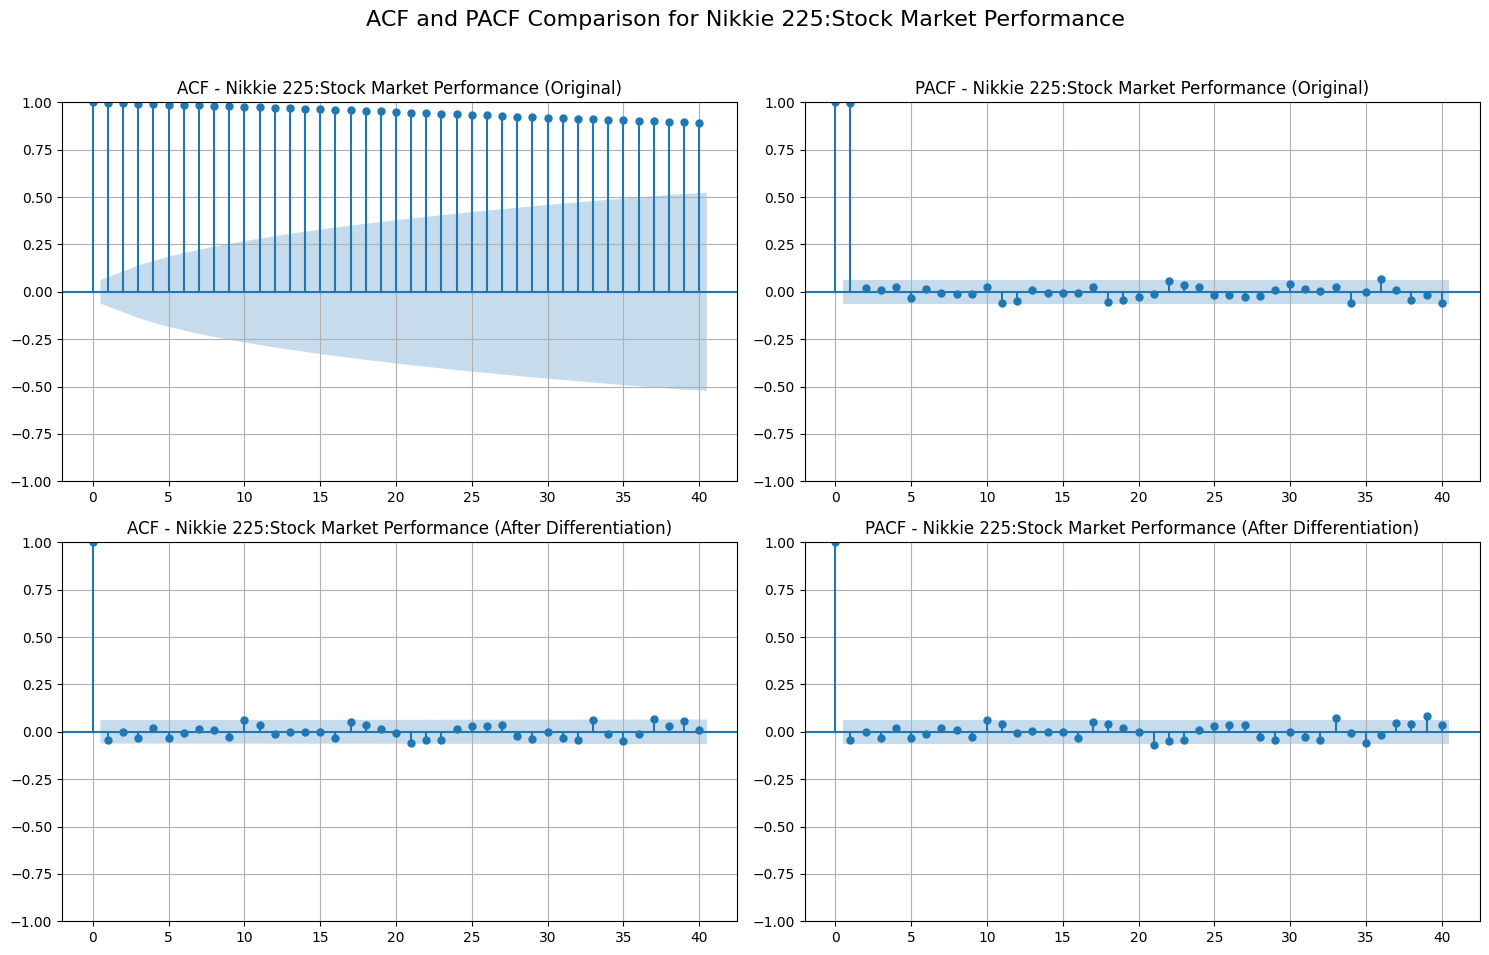

In [69]:
compare_series_acf_pacf(nikkei225_data,nikkei_data_est ,"Nikkie 225:Stock Market Performance")

#olhando os conjuntos

In [70]:
print("--- exchange_data_est.info() ---")
print(exchange_data_est.info())
print("\n--- sunspot_data_est.info() ---")
print(sunspot_data_est.info())
print("\n--- lynx_data_est.info() ---")
print(lynx_data_est.info())
print("\n--- nikkei_data_est.info() ---")
print(nikkei_data_est.info())

--- exchange_data_est.info() ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1980-01-12 to 1993-12-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXUSUK  729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB
None

--- sunspot_data_est.info() ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 1701-01-01 to 1988-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   288 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB
None

--- lynx_data_est.info() ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1821-01-01 to 1934-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   114 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB
None

--- nikkei_data_est.info() ---
<class 'pandas.core.frame.DataFrame'>
D

In [71]:
print("--- exchange_data_est.head() ---")
print(exchange_data_est.head())
print("\n--- sunspot_data_est.head() ---")
print(sunspot_data_est.head())
print("\n--- lynx_data_est.head() ---")
print(lynx_data_est.head())
print("\n--- nikkei_data_est.head() ---")
print(nikkei_data_est.head())

--- exchange_data_est.head() ---
                  DEXUSUK
observation_date         
1980-01-12         0.0200
1980-01-19         0.0285
1980-01-26        -0.0245
1980-02-02         0.0130
1980-02-09         0.0240

--- sunspot_data_est.head() ---
            value
year             
1701-01-01    6.0
1702-01-01    5.0
1703-01-01    7.0
1704-01-01   13.0
1705-01-01   22.0

--- lynx_data_est.head() ---
            value
year             
1821-01-01    269
1822-01-01    321
1823-01-01    585
1824-01-01    871
1825-01-01   1475

--- nikkei_data_est.head() ---
                 value
date                  
2006-03-06  237.820312
2006-03-07 -175.140625
2006-03-08  -98.529297
2006-03-09  409.419922
2006-03-10   78.719727


In [72]:
print("--- exchange_data_est.tail() ---")
print(exchange_data_est.tail())
print("\n--- sunspot_data_est.tail() ---")
print(sunspot_data_est.tail())
print("\n--- lynx_data_est.tail() ---")
print(lynx_data_est.tail())
print("\n--- nikkei_data_est.tail() ---")
print(nikkei_data_est.tail())

--- exchange_data_est.tail() ---
                  DEXUSUK
observation_date         
1993-11-27         0.0083
1993-12-04         0.0105
1993-12-11         0.0045
1993-12-18        -0.0035
1993-12-25         0.0120

--- sunspot_data_est.tail() ---
            value
year             
1984-01-01  -20.7
1985-01-01  -28.0
1986-01-01   -4.5
1987-01-01   15.8
1988-01-01   71.0

--- lynx_data_est.tail() ---
            value
year             
1930-01-01    662
1931-01-01   1000
1932-01-01   1590
1933-01-01   2657
1934-01-01   3396

--- nikkei_data_est.tail() ---
                 value
date                  
2010-03-26  167.520508
2010-03-29   -9.900391
2010-03-30  110.669922
2010-03-31   -7.199219
2010-04-01  154.459961


#treinamento

In [50]:
#as series passam a ter menos 1 ponto sendo observado durante o treinamento <ajustar depois>
#treinamento da serie já estacionaria
train_sunspot_data = sunspot_data_est.loc['1701':'1920'] #76.66%
train_lynx_data = lynx_data_est.loc['1821':'1920']     #87.72%
train_exchange_data=exchange_data_est.loc['1980':'1992'] #92.86%}
train_nikkie225_data=nikkei_data_est.loc['2006/03/06':'2009/06/05']#79.59%

test_sunspot_data = sunspot_data_est.loc['1921':'1987']#23.34%
test_lynx_data = lynx_data_est.loc['1921':'1934']#12.28%
test_exchange_data=exchange_data_est.loc['1993'] #7.14%
test_nikkie225_data=nikkei_data_est.loc['2009/06/06':'2010/04/01']#20.41%

#validação

In [73]:
# 1. Calcule o tamanho do conjunto de validação (10% do treino)
total_train_size = len(train_sunspot_data)
validation_size = int(total_train_size * 0.10) # 10%

# Se a validação_size for 0, defina-a para 1 para garantir que haja pelo menos um ponto de validação
if validation_size == 0 and total_train_size > 0:
    validation_size = 1
elif total_train_size == 0: # Handle empty train set
    validation_size = 0

# 2. Separe o conjunto de validação da parte final do conjunto de treinamento
# A validação será os últimos 'validation_size' pontos do treino original
validation_sunspot_data = train_sunspot_data[-validation_size:]

# 3. O novo conjunto de treinamento será o restante dos dados (tudo, exceto a validação)
new_train_sunspot_data = train_sunspot_data[:-validation_size]

print(f"Tamanho total do treino original: {total_train_size} pontos")
print(f"Tamanho do conjunto de validação (10%): {validation_size} pontos")
print(f"Tamanho do novo conjunto de treinamento: {len(new_train_sunspot_data)} pontos")

print("\nExemplo de índices (datas) para visualização:")
print(f"Início do novo treino: {new_train_sunspot_data.index.min()}")
print(f"Fim do novo treino: {new_train_sunspot_data.index.max()}")
print(f"Início da validação: {validation_sunspot_data.index.min()}")
print(f"Fim da validação: {validation_sunspot_data.index.max()}")

Tamanho total do treino original: 220 pontos
Tamanho do conjunto de validação (10%): 22 pontos
Tamanho do novo conjunto de treinamento: 198 pontos

Exemplo de índices (datas) para visualização:
Início do novo treino: 1701-01-01 00:00:00
Fim do novo treino: 1898-01-01 00:00:00
Início da validação: 1899-01-01 00:00:00
Fim da validação: 1920-01-01 00:00:00


In [74]:
# 1. Calcule o tamanho do conjunto de validação (10% do treino)
total_train_size = len(train_lynx_data)
validation_size = int(total_train_size * 0.10) # 10%

# Se a validação_size for 0, defina-a para 1 para garantir que haja pelo menos um ponto de validação
if validation_size == 0 and total_train_size > 0:
    validation_size = 1
elif total_train_size == 0: # Handle empty train set
    validation_size = 0

# 2. Separe o conjunto de validação da parte final do conjunto de treinamento
# A validação será os últimos 'validation_size' pontos do treino original
validation_lynx_data = train_lynx_data[-validation_size:]

# 3. O novo conjunto de treinamento será o restante dos dados (tudo, exceto a validação)
new_train_lynx_data = train_lynx_data[:-validation_size]

print(f"Tamanho total do treino original: {total_train_size} pontos")
print(f"Tamanho do conjunto de validação (10%): {validation_size} pontos")
print(f"Tamanho do novo conjunto de treinamento: {len(new_train_lynx_data)} pontos")

print("\nExemplo de índices (datas) para visualização:")
print(f"Início do novo treino: {new_train_lynx_data.index.min()}")
print(f"Fim do novo treino: {new_train_lynx_data.index.max()}")
print(f"Início da validação: {validation_lynx_data.index.min()}")
print(f"Fim da validação: {validation_lynx_data.index.max()}")

Tamanho total do treino original: 100 pontos
Tamanho do conjunto de validação (10%): 10 pontos
Tamanho do novo conjunto de treinamento: 90 pontos

Exemplo de índices (datas) para visualização:
Início do novo treino: 1821-01-01 00:00:00
Fim do novo treino: 1910-01-01 00:00:00
Início da validação: 1911-01-01 00:00:00
Fim da validação: 1920-01-01 00:00:00


In [75]:
# 1. Calcule o tamanho do conjunto de validação (10% do treino)
total_train_size = len(train_nikkie225_data)
validation_size = int(total_train_size * 0.10) # 10%

# Se a validação_size for 0, defina-a para 1 para garantir que haja pelo menos um ponto de validação
if validation_size == 0 and total_train_size > 0:
    validation_size = 1
elif total_train_size == 0: # Handle empty train set
    validation_size = 0

# 2. Separe o conjunto de validação da parte final do conjunto de treinamento
# A validação será os últimos 'validation_size' pontos do treino original
validation_nikkie225_data = train_nikkie225_data[-validation_size:]

# 3. O novo conjunto de treinamento será o restante dos dados (tudo, exceto a validação)
new_train_nikkie225_data = train_nikkie225_data[:-validation_size]

print(f"Tamanho total do treino original: {total_train_size} pontos")
print(f"Tamanho do conjunto de validação (10%): {validation_size} pontos")
print(f"Tamanho do novo conjunto de treinamento: {len(new_train_nikkie225_data)} pontos")

print("\nExemplo de índices (datas) para visualização:")
print(f"Início do novo treino: {new_train_nikkie225_data.index.min()}")
print(f"Fim do novo treino: {new_train_nikkie225_data.index.max()}")
print(f"Início da validação: {validation_nikkie225_data.index.min()}")
print(f"Fim da validação: {validation_nikkie225_data.index.max()}")

Tamanho total do treino original: 799 pontos
Tamanho do conjunto de validação (10%): 79 pontos
Tamanho do novo conjunto de treinamento: 720 pontos

Exemplo de índices (datas) para visualização:
Início do novo treino: 2006-03-06 00:00:00
Fim do novo treino: 2009-02-06 00:00:00
Início da validação: 2009-02-09 00:00:00
Fim da validação: 2009-06-05 00:00:00


In [76]:
# 1. Calcule o tamanho do conjunto de validação (10% do treino)
total_train_size = len(train_exchange_data)
validation_size = int(total_train_size * 0.10) # 10%

# Se a validação_size for 0, defina-a para 1 para garantir que haja pelo menos um ponto de validação
if validation_size == 0 and total_train_size > 0:
    validation_size = 1
elif total_train_size == 0: # Handle empty train set
    validation_size = 0

# 2. Separe o conjunto de validação da parte final do conjunto de treinamento
# A validação será os últimos 'validation_size' pontos do treino original
validation_exchange_data = train_exchange_data[-validation_size:]

# 3. O novo conjunto de treinamento será o restante dos dados (tudo, exceto a validação)
new_train_exchange_data = train_exchange_data[:-validation_size]

print(f"Tamanho total do treino original: {total_train_size} pontos")
print(f"Tamanho do conjunto de validação (10%): {validation_size} pontos")
print(f"Tamanho do novo conjunto de treinamento: {len(new_train_exchange_data)} pontos")

print("\nExemplo de índices (datas) para visualização:")
print(f"Início do novo treino: {new_train_exchange_data.index.min()}")
print(f"Fim do novo treino: {new_train_exchange_data.index.max()}")
print(f"Início da validação: {validation_exchange_data.index.min()}")
print(f"Fim da validação: {validation_exchange_data.index.max()}")

Tamanho total do treino original: 677 pontos
Tamanho do conjunto de validação (10%): 67 pontos
Tamanho do novo conjunto de treinamento: 610 pontos

Exemplo de índices (datas) para visualização:
Início do novo treino: 1980-01-12 00:00:00
Fim do novo treino: 1991-09-14 00:00:00
Início da validação: 1991-09-21 00:00:00
Fim da validação: 1992-12-26 00:00:00


#arima model

In [ ]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import itertools
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.stats.diagnostic import acorr_ljungbox


series=lynx_data["value"]
# --- 2. Define Parameters for Grid Search (pure ARIMA) ---
# Non-seasonal p, d, q parameters
# We'll test orders from 0 to 3 for p, d, and q.
p = d = q = range(0, 4)
pdq_combinations = list(itertools.product(p, d, q))

# Initialize variables to store the best model configurations and their scores
best_rmse_score, best_rmse_cfg = float("inf"), None
best_mae_score, best_mae_cfg = float("inf"), None
best_mse_score, best_mse_cfg = float("inf"), None

# List to store results of all tested combinations
all_results = []

print("\n--- Starting Grid Search for pure ARIMA ---")
print(f"Testing {len(pdq_combinations)} combinations...")

# --- 3. Grid Search Loop ---
for param_non_seasonal in pdq_combinations:
    try:
        # Create and train the ARIMA model (no seasonal_order argument for pure ARIMA)
        # Use 'train_data' for fitting the model
        model = ARIMA(new_train_lynx_data, order=param_non_seasonal)
        model_fit = model.fit()

        # Generate forecast for the test period
        forecast_values = model_fit.forecast(steps=len(test_lynx_data))

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(test_lynx_data, forecast_values))
        mae = mean_absolute_error(test_lynx_data, forecast_values)
        mse = mean_squared_error(test_lynx_data, forecast_values)
        aic = model_fit.aic # Akaike Information Criterion

        # Store the results for the current combination
        all_results.append({
            'params_non_seasonal': param_non_seasonal,
            'rmse': rmse,
            'mae': mae,
            'mse': mse,
            'aic': aic
        })

        # Update best configurations based on each metric
        if rmse < best_rmse_score:
            best_rmse_score, best_rmse_cfg = rmse, param_non_seasonal

        if mae < best_mae_score:
            best_mae_score, best_mae_cfg = mae, param_non_seasonal

        if mse < best_mse_score:
            best_mse_score, best_mse_cfg = mse, param_non_seasonal

        print(f"ARIMA{param_non_seasonal} -> RMSE={rmse:.3f}, MAE={mae:.3f}, MSE={mse:.3f}, AIC={aic:.3f}")

    except Exception as e:
        # Catch exceptions for combinations that might not converge or are invalid
        # print(f"ARIMA{param_non_seasonal} failed: {e}") # Uncomment to see specific errors
        continue

# --- 4. Display Best Results ---
print("\n--- Grid Search Results ---")
print(f"Best configuration by RMSE: ARIMA{best_rmse_cfg} with RMSE={best_rmse_score:.3f}")
print(f"Best configuration by MAE: ARIMA{best_mae_cfg} with MAE={best_mae_score:.3f}")
print(f"Best configuration by MSE: ARIMA{best_mse_cfg} with MSE={best_mse_score:.3f}")

# Convert all results to a Pandas DataFrame for easy viewing
results_df = pd.DataFrame(all_results).sort_values(by='rmse')
print("\nTop 5 Best Configurations (sorted by RMSE):")
print(results_df.head())

# --- 5. Train Final Model, Forecast, and Calculate Residuals ---
if best_rmse_cfg: # Use the best RMSE model for final analysis
    print(f"\n--- Training the final ARIMA model (based on RMSE) ---")
    print(f"Using configuration: ARIMA{best_rmse_cfg}")

    # Train the final model on the ENTIRE dataset for better future predictions
    final_model = ARIMA(series, order=best_rmse_cfg)
    final_model_fit = final_model.fit()

    # Generate forecasts for the test period (for residual calculation)
    # The `start` and `end` arguments specify the range within the *original series index*
    forecast_for_test_period = final_model_fit.predict(start= new_train_sunspot_data, end=len(series)-1)

    # Ensure forecast_for_test_period has the same index as test_data
    forecast_for_test_period.index = test_lynx_data.index


    # Calculate residuals for the test period
    residuals_test_period = test_lynx_data - forecast_for_test_period

    # Print metrics for the final model on the test period
    final_rmse = np.sqrt(mean_squared_error(test_lynx_data, forecast_for_test_period))
    final_mae = mean_absolute_error(test_lynx_data, forecast_for_test_period)
    final_mse = mean_squared_error(test_lynx_data, forecast_for_test_period)

    print(f"\nFinal model metrics on test period:")
    print(f"  RMSE: {final_rmse:.3f}")
    print(f"  MAE: {final_mae:.3f}")
    print(f"  MSE: {final_mse:.3f}")

    # Generate future forecasts (out-of-sample)
    # Define how many steps into the future you want to forecast.
    future_steps = 12 # Example: forecasting the next 12 periods
    future_forecast = final_model_fit.forecast(steps=future_steps)

    print(f"\nFuture forecasts for the next {future_steps} periods:")
    print(future_forecast)

    # --- 6. Save Forecasts and Residuals to CSV ---
    # Create a DataFrame to save the actual, forecasted, and residual values for the test period
    forecast_residuals_df = pd.DataFrame({
        'actual_value': test_lynx_data,
        'forecasted_value': forecast_for_test_period,
        'residual': residuals_test_period
    })

    # Save to CSV
    forecast_residuals_df.to_csv("arima_test_forecast_and_residuals.csv")
    future_forecast.to_csv("arima_future_forecast.csv", header=True) # Save future predictions

    print("\n'arima_test_forecast_and_residuals.csv' saved (actual, forecast, residuals for test period).")
    print("'arima_future_forecast.csv' saved (future predictions).")

    # --- 7. Visualize Results and Analyze Residuals (Highly Recommended) ---
    plt.figure(figsize=(14, 7))
    plt.plot(series.index, series, label='Original Series', color='blue')
    plt.plot(test_lynx_data.index, forecast_for_test_period, label='Forecast (Test Period)', color='orange', linestyle='--')
    plt.plot(future_forecast.index, future_forecast, label=f'Future Forecast ({future_steps} steps)', color='green', linestyle=':')
    plt.title('Time Series: Original, Test Forecast, and Future Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.plot(residuals_test_period.index, residuals_test_period, label='Residuals (Test Period)', color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title('Residuals of the Best ARIMA Model')
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ACF and PACF of residuals to check for remaining autocorrelation
    tsa_plots.plot_acf(residuals_test_period, lags=20, title='Autocorrelation Function (ACF) of Residuals')
    plt.show()
    tsa_plots.plot_pacf(residuals_test_period, lags=20, title='Partial Autocorrelation Function (PACF) of Residuals')
    plt.show()

    # Ljung-Box test for autocorrelation in residuals
    # A p-value > 0.05 generally indicates no significant autocorrelation (residuals are white noise)
    ljung_box_test = acorr_ljungbox(residuals_test_period, lags=[10], return_df=True)
    print("\nLjung-Box Test on Residuals (p-value > 0.05 suggests no significant autocorrelation):")
    print(ljung_box_test)

else:
    print("\nNo valid ARIMA model configurations were found during the Grid Search.")



--- Starting Grid Search for pure ARIMA ---
Testing 64 combinations...
ARIMA(0, 0, 0) -> RMSE=1136.864, MAE=977.500, MSE=1292458.686, AIC=1592.151


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(0, 0, 1) -> RMSE=1120.075, MAE=960.707, MSE=1254567.151, AIC=1521.267
ARIMA(0, 0, 2) -> RMSE=1093.941, MAE=930.412, MSE=1196706.309, AIC=1496.585


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(0, 0, 3) -> RMSE=1110.789, MAE=949.233, MSE=1233851.847, AIC=1495.248
ARIMA(0, 1, 0) -> RMSE=1386.661, MAE=1051.214, MSE=1922829.929, AIC=1521.677


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(0, 1, 1) -> RMSE=1339.706, MAE=1027.188, MSE=1794813.163, AIC=1499.211
ARIMA(0, 1, 2) -> RMSE=1328.769, MAE=1021.063, MSE=1765628.255, AIC=1501.462


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(0, 1, 3) -> RMSE=1098.934, MAE=931.279, MSE=1207655.813, AIC=1483.695
ARIMA(0, 2, 0) -> RMSE=2969.123, MAE=2482.643, MSE=8815692.500, AIC=1522.424
ARIMA(0, 2, 1) -> RMSE=1346.380, MAE=1026.189, MSE=1812739.907, AIC=1511.307


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(0, 2, 2) -> RMSE=1300.100, MAE=1000.833, MSE=1690260.410, AIC=1488.636


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 3) -> RMSE=1286.852, MAE=994.108, MSE=1655989.031, AIC=1490.527
ARIMA(0, 3, 0) -> RMSE=22915.507, MAE=17951.786, MSE=525120443.786, AIC=1568.908


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(0, 3, 1) -> RMSE=3164.328, MAE=2638.323, MSE=10012968.825, AIC=1511.441


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 2) -> RMSE=2726.445, MAE=2277.395, MSE=7433502.036, AIC=1513.241


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 3) -> RMSE=1189.471, MAE=956.122, MSE=1414842.439, AIC=1481.737
ARIMA(1, 0, 0) -> RMSE=1114.249, MAE=926.310, MSE=1241550.790, AIC=1529.233


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(1, 0, 1) -> RMSE=1101.931, MAE=929.353, MSE=1214251.266, AIC=1498.806


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) -> RMSE=1099.329, MAE=933.257, MSE=1208524.403, AIC=1495.548


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 3) -> RMSE=1196.918, MAE=946.792, MSE=1432613.889, AIC=1495.475
ARIMA(1, 1, 0) -> RMSE=1241.946, MAE=975.605, MSE=1542429.360, AIC=1508.715
ARIMA(1, 1, 1) -> RMSE=1333.716, MAE=1023.821, MSE=1778798.218, AIC=1501.664


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(1, 1, 2) -> RMSE=1112.605, MAE=932.011, MSE=1237890.270, AIC=1485.135


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) -> RMSE=1106.863, MAE=935.245, MSE=1225145.072, AIC=1482.114
ARIMA(1, 2, 0) -> RMSE=2881.056, MAE=2407.012, MSE=8300486.313, AIC=1524.353


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(1, 2, 1) -> RMSE=1195.458, MAE=956.435, MSE=1429119.518, AIC=1497.958
ARIMA(1, 2, 2) -> RMSE=1292.437, MAE=996.209, MSE=1670394.005, AIC=1490.578


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(1, 2, 3) -> RMSE=1396.788, MAE=1053.143, MSE=1951017.026, AIC=1490.851
ARIMA(1, 3, 0) -> RMSE=38684.729, MAE=30208.584, MSE=1496508267.177, AIC=1559.937


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(1, 3, 1) -> RMSE=3083.369, MAE=2569.756, MSE=9507165.507, AIC=1513.385
ARIMA(1, 3, 2) -> RMSE=2947.121, MAE=2452.237, MSE=8685520.624, AIC=1514.123


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

ARIMA(1, 3, 3) -> RMSE=1184.724, MAE=954.832, MSE=1403571.211, AIC=1483.605
ARIMA(2, 0, 0) -> RMSE=1139.196, MAE=996.234, MSE=1297767.497, AIC=1487.877
ARIMA(2, 0, 1) -> RMSE=1137.538, MAE=993.416, MSE=1293992.603, AIC=1489.801
ARIMA(2, 0, 2) -> RMSE=1031.632, MAE=881.329, MSE=1064264.197, AIC=1487.493


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 3) -> RMSE=822.863, MAE=717.222, MSE=677103.331, AIC=1481.942
ARIMA(2, 1, 0) -> RMSE=1365.419, MAE=1055.315, MSE=1864368.397, AIC=1496.124


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(2, 1, 1) -> RMSE=1133.717, MAE=990.949, MSE=1285314.925, AIC=1475.339


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

ARIMA(2, 1, 2) -> RMSE=1131.648, MAE=986.409, MSE=1280626.718, AIC=1477.046


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

ARIMA(2, 1, 3) -> RMSE=1033.738, MAE=883.993, MSE=1068613.998, AIC=1475.326
ARIMA(2, 2, 0) -> RMSE=1985.300, MAE=1603.440, MSE=3941417.512, AIC=1514.423
ARIMA(2, 2, 1) -> RMSE=1324.807, MAE=1028.478, MSE=1755112.326, AIC=1485.974


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-

ARIMA(2, 2, 2) -> RMSE=1145.690, MAE=1048.204, MSE=1312606.035, AIC=1469.693
ARIMA(2, 2, 3) -> RMSE=1515.612, MAE=1113.741, MSE=2297078.481, AIC=1492.038
ARIMA(2, 3, 0) -> RMSE=38552.833, MAE=29933.215, MSE=1486320919.764, AIC=1543.675


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

ARIMA(2, 3, 1) -> RMSE=2047.401, MAE=1661.610, MSE=4191852.427, AIC=1503.903


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-

ARIMA(2, 3, 2) -> RMSE=1607.554, MAE=1225.264, MSE=2584231.377, AIC=1480.405


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


ARIMA(2, 3, 3) -> RMSE=2154.645, MAE=1968.497, MSE=4642497.057, AIC=1489.211
ARIMA(3, 0, 0) -> RMSE=1139.824, MAE=996.573, MSE=1299198.181, AIC=1489.859


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 1) -> RMSE=1127.592, MAE=983.855, MSE=1271464.190, AIC=1490.961


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-

ARIMA(3, 0, 2) -> RMSE=1387.758, MAE=1095.762, MSE=1925873.028, AIC=1487.518
ARIMA(3, 0, 3) -> RMSE=1038.191, MAE=874.399, MSE=1077840.793, AIC=1490.388
ARIMA(3, 1, 0) -> RMSE=1327.100, MAE=1036.236, MSE=1761193.105, AIC=1497.475


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

##lynx

In [ ]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools


# Parâmetros a testar
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_score, best_cfg = float("inf"), None

for param in pdq:
    try:
        model = ARIMA(new_train_lynx_data, order=param)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_lynx_data))
        rmse = np.sqrt(mean_squared_error(test_lynx_data, forecast))
        if rmse < best_score:
            best_score, best_cfg = rmse, param
        print(f"ARIMA{param} RMSE={rmse:.3f}")
    except:
        continue

print(f"\nMelhor configuração: ARIMA{best_cfg} com RMSE={best_score:.3f}")

#Teste de Ljung-Box

In [ ]:
#The Ljung-Box test is widely used to test for autocorrelation remaining in the residuals after fitting a model to a time series. In this post, I look at the degrees of freedom used in such tests.

#salvar resultados

In [ ]:

import pandas as pd

def salvar_resultados(nome_modelo, y_real, y_previsto, residuos, caminho='resultados'):
    import os
    os.makedirs(caminho, exist_ok=True)

    df_resultado = pd.DataFrame({
        'y_real': y_real,
        'y_previsto': y_previsto,
        'residuo': residuos
    })
    df_resultado.to_csv(f"{caminho}/resultados_{nome_modelo}.csv", index=False)
    print(f"📁 Resultados salvos: {caminho}/resultados_{nome_modelo}.csv")

#normalização dos residuos

In [ ]:
inter_min = 0
inter_max = 1

scaler_sunspot = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_lynx = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_exchangerate = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_nikkie225 = MinMaxScaler(feature_range=(inter_min, inter_max))

train_sunspot_data_normalized = scaler_sunspot.fit_transform(residual_sunport_data

#janelamento do residuo

In [ ]:
def create_sliding_windows(series, window_size):

    list_of_sliding_windows = []
    # Ensure series_values is 1D for slicing, if it came from a column vector
    series_values = series.flatten() if series.ndim > 1 else series

    # If series is too short to even form one window + target
    if len(series_values) < window_size + 1:
        return np.empty((0, window_size + 1)) # Return empty array with correct number of columns

    # Number of possible windows to create
    list_size_to_iterate = len(series_values) - window_size

    for i in range(list_size_to_iterate): # Loop from 0 up to (length - window_size - 1)
        # Each window includes 'window_size' input features and 1 target (window_size + 1 total)
        window = series_values[i : i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows)

#seleção de lag do residuo

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg # Make sure to install statsmodels: pip install statsmodels

# --- Configuration for Lag Selection GA ---
MAX_LAG = 30         # The maximum possible lag order to consider (N_GENES for the binary string)
POP_SIZE = 100       # Population size
MUTATION_RATE = 0.05 # Probability of a bit flipping
NUM_GENERATIONS = 200 # Number of generations to run the GA

# --- Dummy Time Series Data for Demonstration ---
# In a real application, you MUST replace this with your actual time series data.
# This dummy data simulates a series with some autoregressive properties to make lag selection meaningful.
np.random.seed(42)
n_samples = 200


print(f"--- GA Setup for Lag Selection ---")
print(f"Time Series Data Length: {len(time_series_data)}")
print(f"Maximum Lag to Consider (MAX_LAG): {MAX_LAG}")
print(f"Population Size: {POP_SIZE}")
print(f"Mutation Rate: {MUTATION_RATE}")
print(f"Number of Generations: {NUM_GENERATIONS}\n")

# --- GA Core Functions (Adapted for Lag Selection) ---

def criar_populacao_inicial(tamanho_populacao, tamanho_individuo):
    """
    Cria uma população inicial de indivíduos (bitstrings aleatórias).
    Cada bit representa a inclusão (1) ou exclusão (0) de uma lag.
    """
    populacao = []
    for _ in range(tamanho_populacao):
        individuo = ''.join(random.choice(['0', '1']) for _ in range(tamanho_individuo))
        populacao.append(individuo)
    return populacao

def calcular_fitness_lag_selection(individuo_binary_string, time_series_data_local):
    """
    Calcula o fitness de um indivíduo para seleção de lags.
    O fitness é o AIC (Akaike Information Criterion) de um modelo AutoReg.
    Menor AIC indica melhor fitness (modelo mais parcimonioso e com bom ajuste).
    """
    selected_lags = []
    # Convert binary string to a list of selected lag orders (1-indexed)
    # If the bit at index 'i' is '1', then lag 'i+1' is selected.
    for i, bit in enumerate(individuo_binary_string):
        if bit == '1':
            selected_lags.append(i + 1) # Lag order is i+1

    # If no lags are selected, or if the number of selected lags is too high for the data,
    # assign a very high penalty (bad fitness).
    # Also, ensure at least one lag is selected for a meaningful AR model.
    if not selected_lags or len(time_series_data_local) <= max(selected_lags):
        return float('inf')

    # Sort lags for AutoReg model (statsmodels expects them sorted)
    selected_lags.sort()

    try:
        # Fit an AR model with the selected lags
        # 'trend=c' includes a constant (intercept) in the model.
        model = AutoReg(time_series_data_local, lags=selected_lags, trend='c')
        model_fit = model.fit()
        fitness = model_fit.aic
        return fitness
    except Exception as e:
        # Catch exceptions that might occur during model fitting (e.g., singular matrix).
        # Assign a very high penalty to individuals that lead to such errors.
        # print(f"Warning: Model fitting failed for lags {selected_lags}. Error: {e}") # For debugging
        return float('inf')

def selecionar_pais_roleta_minimization(populacao, fitness_func, time_series_data_local):
    """
    Seleciona pais para reprodução usando seleção por roleta,
    adaptada para problemas de minimização (menor fitness é melhor).
    """
    fitness_values = [fitness_func(individuo, time_series_data_local) for individuo in populacao]

    # Handle cases where all fitness values are infinity (no valid models found yet)
    if all(f == float('inf') for f in fitness_values):
        # Fallback to random selection if no valid individuals, to prevent stagnation
        return random.sample(populacao, len(populacao))

    # Invert fitness for minimization problem (lower AIC is better, higher probability)
    # Add a small constant to inverted fitness to avoid division by zero
    # The higher the inverse fitness, the higher the probability of selection.
    inverted_fitness = [
        (1 / (f + 1e-6)) if f != float('inf') else 0
        for f in fitness_values
    ]

    fitness_total = sum(inverted_fitness)

    if fitness_total == 0:
        # If all inverted fitness values are 0 (e.g., all models failed after penalty)
        return random.sample(populacao, len(populacao)) # Select randomly to introduce diversity

    probabilities = [f / fitness_total for f in inverted_fitness]

    pais = []
    # Select parents using roulette wheel based on probabilities
    # `k=len(populacao)` ensures we select enough parents for the next generation
    indices = np.random.choice(len(populacao), size=len(populacao), p=probabilities)
    pais = [populacao[i] for i in indices]
    return pais

def cruzar(pai1, pai2):
    """Realiza o crossover de um ponto entre dois pais (bitstrings)."""
    # Ensure point is within bounds, avoiding cutting at the very beginning or end
    ponto_corte = random.randint(1, len(pai1) - 1)
    filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
    filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
    return filho1, filho2

def mutar(individuo, taxa_mutacao):
    """Aplica mutação a um indivíduo (troca um bit com probabilidade taxa_mutacao)."""
    novo_individuo = ''
    for bit in individuo:
        if random.random() < taxa_mutacao:
            # Flip the bit
            bit_mutado = '1' if bit == '0' else '0'
            novo_individuo = novo_individuo + bit_mutado
        else:
            novo_individuo += bit
    return novo_individuo

def algoritmo_genetico_lag_selection(tamanho_populacao, tamanho_individuo, taxa_mutacao, num_geracoes, time_series_data_input):
    """
    Implementa o Algoritmo Genético para a seleção de lags ótimos
    para um modelo de série temporal (usando AIC como fitness).
    """
    populacao = criar_populacao_inicial(tamanho_populacao, tamanho_individuo)
    melhores_fit_ger = [] # Stores the best fitness found in each generation

    # Initial evaluation to get the best fitness before the loop starts (optional but good for tracking)
    initial_fitness_values = [calcular_fitness_lag_selection(ind, time_series_data_input) for ind in populacao]
    melhores_fit_ger.append(min(initial_fitness_values))


    for geracao in tqdm(range(num_geracoes), desc="GA Generations"):
        # Avaliação de toda a população
        fitness_populacao = [calcular_fitness_lag_selection(individuo, time_series_data_input) for individuo in populacao]

        # Encontra o melhor fitness desta geração (para acompanhamento da convergência)
        current_best_fitness = min(fitness_populacao)
        melhores_fit_ger.append(current_best_fitness)

        # Seleção dos pais
        pais = selecionar_pais_roleta_minimization(populacao, calcular_fitness_lag_selection, time_series_data_input)

        # Geração da nova população através de Crossover e Mutação
        nova_populacao = []
        # Ensure we generate enough offspring to fill the next population
        for i in range(0, len(pais), 2):
            # If there's an odd number of parents, the last one might be skipped,
            # or you can handle it by just adding the last parent as-is or cloning.
            # Here, we ensure we always have pairs for crossover.
            if i + 1 < len(pais):
                filho1, filho2 = cruzar(pais[i], pais[i + 1])
                # Mutate children immediately after crossover
                nova_populacao.extend([mutar(filho1, taxa_mutacao), mutar(filho2, taxa_mutacao)])
            else:
                # If there's an odd parent, add it (mutated) to ensure population size is maintained
                nova_populacao.append(mutar(pais[i], taxa_mutacao))


        # Ensure the population size remains constant
        # If nova_populacao is larger, truncate it; if smaller, fill with random individuals (less ideal but works)
        if len(nova_populacao) > tamanho_populacao:
            populacao = nova_populacao[:tamanho_populacao]
        elif len(nova_populacao) < tamanho_populacao:
            # This case shouldn't ideally happen if selection and crossover are done correctly
            # but as a safeguard, fill with new random individuals.
            fill_count = tamanho_populacao - len(nova_populacao)
            populacao = nova_populacao + criar_populacao_inicial(fill_count, tamanho_individuo)
        else:
            populacao = nova_populacao

    # Após todas as gerações, encontra o melhor indivíduo na população final
    melhor_individuo = min(populacao, key=lambda ind: calcular_fitness_lag_selection(ind, time_series_data_input))
    melhor_fitness = calcular_fitness_lag_selection(melhor_individuo, time_series_data_input)

    return melhor_individuo, melhor_fitness, melhores_fit_ger

# --- Main Execution ---
if __name__ == "__main__":
    # Execute the GA for Lag Selection
    best_lag_individual, best_lag_fitness, historical_fitness = algoritmo_genetico_lag_selection(
        POP_SIZE, MAX_LAG, MUTATION_RATE, NUM_GENERATIONS, time_series_data
    )

    print("\n--- GA Results for Lag Selection ---")
    print(f"Best Individual (Binary Lags String): {best_lag_individual}")
max
    # Convert the binary string to a list of 1-indexed selected lags
    selected_lags = [i + 1 for i, bit in enumerate(best_lag_individual) if bit == '1']
    selected_lags.sort() # Ensure lags are sorted for consistent output
    print(f"Selected Lags (1-indexed): {selected_lags}")
    print(f"Best Fitness (AIC): {best_lag_fitness:.4f}")

    # Optional: Plotting the convergence of the best fitness
    plt.figure(figsize=(10, 6))
    plt.plot(historical_fitness)
    plt.title('Convergence of Best Fitness (AIC) over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best AIC')
    plt.grid(True)
    plt.yscale('log') # Use log scale for AIC often makes convergence clearer
    plt.show()

    # You can now use `selected_lags` to train your final AR model
    # Example:
    try:
        if selected_lags:
            final_model = AutoReg(time_series_data, lags=selected_lags, trend='c')
            final_model_fit = final_model.fit()
            print("\n--- Final Model Summary with Selected Lags ---")
            print(final_model_fit.summary())
        else:
            print("\nNo lags were selected by the GA for the best individual. Cannot build a final AR model.")
    except Exception as e:
        print(f"\nError building final model with selected lags: {e}")

#MLP

In [ ]:
def treinar_mlp(x_train, y_train, x_val, y_val, num_exec):

    neuronios = [5, 10,25]
    func_activation = [ 'tanh','logistic', 'relu']
    alg_treinamento = ['lbfgs', 'sgd', 'adam']

    max_iteracoes = [5000, 10000, 20000]  # Tente valores maiore
    learning_rate = ['adaptive']#, 'invscaling', 'adaptive']

    best_result = np.Inf
    """para otimizar o código reduzindo os laços utilize o itertools:

    import itertools
    hyper_param = list(itertools.product(neuronios,func_activation,alg_treinamento,max_iteracoes, learning_rate))
    for i, j, l, m, n in hyper_param:

    """

    for i in range(0,len(neuronios)):
        for j in range(0,len(func_activation)):
            for l in range(0,len(alg_treinamento)):
                for m in range(0,len(max_iteracoes)):
                    for n in range(0,len(learning_rate)):

                        for e in range(0,num_exec):
                            mlp = MLPRegressor(hidden_layer_sizes=neuronios[i], activation=func_activation[j], solver=alg_treinamento[l], max_iter = max_iteracoes[m], learning_rate= learning_rate[n])
                            mlp.fit(x_train, y_train)
                            predict_validation = mlp.predict(x_val)

                            mse = MSE(y_val, predict_validation)


                            if mse < best_result:
                                best_result = mse
                                select_model = mlp
                                print('func: ', func_activation[j])





    return select_model

#SVM

#LSTM


# SALVAR TODOS OS CONJUNTOS PROCESSADOS PARA CADA DATASET


In [ ]:
import os
# Definindo o diretório onde os arquivos serão salvos
output_dir = "processed_time_series_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Diretório '{output_dir}' criado.")

print("\n--- Salvando todos os conjuntos processados para cada dataset ---")

for name, data_sets in processed_data.items():
    file_path = os.path.join(output_dir, f"{name}_sets.npz")
    np.savez_compressed(
        file_path,
        X_train=data_sets["X_train"],
        y_train=data_sets["y_train"],
        X_val=data_sets["X_val"],
        y_val=data_sets["y_val"],
        X_test=data_sets["X_test"],
        y_test=data_sets["y_test"]
    )
    print(f"'{name}_sets.npz' salvo com sucesso em '{output_dir}'.")

print("\nTodos os conjuntos foram salvos!")

#ajuda ajuda alguem me ajuda

In [ ]:
# Referências para Modelagem de Séries Temporais



#https://otexts.com/fpppy/nbs/02-graphics.html
#https://www.tylervigen.com/spurious-correlations

#https://www.ibm.com/br-pt/think/topics/autocorrelation
#https://www.linkedin.com/pulse/como-realizar-uma-an%C3%A1lise-de-correla%C3%A7%C3%A3o-em-s%C3%A9ries-r-oliveira-batista/
#https://otexts.com/fpppg/acf.html




## ARIMA / SARIMA

- [GitHub: ARIMA model time series prediction (Python)](https://github.com/liannewriting/YouTube-videos-public/tree/main/arima-model-time-series-prediction-python)
- [YouTube: ARIMA Time Series Tutorial](https://www.youtube.com/watch?v=Rl_tMSc_wKo)
- [Medium: Time Series Forecasting with ARIMA, SARIMA and SARIMAX](https://medium.com/data-science/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6)
- [Towards Data Science: Understanding ARIMA Time Series Modeling](https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8/)
- [Towards Data Science: Time Series Forecasting using Auto-ARIMA in Python](https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd)
- [Medium: Estimating ARIMA and SARIMA coefficients using Genetic Algorithm](https://medium.com/@mouse3mic3/estimating-arima-and-sarima-coefficients-using-genetic-algorithm-03f24ab66589)
- [Kaggle Discussions: ARIMA Questions and Answers](https://www.kaggle.com/discussions/questions-and-answers/199346)
- [DataCamp Tutorial: ARIMA](https://www.datacamp.com/tutorial/arima)
- [Medium: ARIMA Model from Scratch in Python](https://medium.com/analytics-vidhya/arima-model-from-scratch-in-python-489e961603ce)

## Artigos Científicos e Modelos Híbridos

- [arXiv Paper (2025): Time Series Forecasting with Large Language Models](https://arxiv.org/pdf/2504.08940)
- [Neurocomputing Paper: Hybrid Forecasting Models](https://eprints.bournemouth.ac.uk/11186/1/Neurocomputing_Lemke_Gabrys_2009_accepted.pdf)
- [GitHub: Additive Hybrid Model with MLP](https://github.com/domingos108/hybrid_system_forecast/blob/master/additive_hybrid_model_mlp.ipynb)

## Séries Temporais e Pandas

- [Towards Data Science: Introducing Time Series in Pandas (Parte 1)](https://towardsdatascience.com/introducing-time-series-in-pandas-09c7cab569b4/)
- [Pandas Docs: Time Series Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

## Redes Neurais para Séries Temporais (MLP, LSTM, GRU)

- [Towards Data Science: Neural Network MLP for Time Series Forecasting in Practice](https://towardsdatascience.com/neural-network-mlp-for-time-series-forecasting-in-practice-04c47c1e3711/)
- [Towards Data Science: Exploring the LSTM Neural Network Model for Time Series](https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf/)
- [Gabe Nosek: Time Series Stock Prediction with LSTM](https://gabenosek.medium.com/time-series-stock-prediction-with-lstm-eb04f2224c22)
- [Medium: Time Series Prediction with LSTM, Bi-LSTM, GRU](https://medium.com/data-science-data-engineering/time-series-prediction-lstm-bi-lstm-gru-99334fc16d75)
- [Towards Data Science: Time Series ARIMA vs SARIMA vs LSTM - Hands-on Tutorial](https://towardsdatascience.com/time-series-arima-vs-sarima-vs-lstm-hands-on-tutorial-bd5630298da3/)
- [Towards Data Science: Hands-on Neural Networks and Time Series with Python](https://towardsdatascience.com/hands-on-neural-networks-and-time-series-with-python-a61d7d75f3d9/)
- [Medium (Português): Introdução às Redes LSTM - Prevendo valor de ações na bolsa](https://medium.com/datarisk-io/introdu%C3%A7%C3%A3o-%C3%A0s-redes-lstm-prevendo-valor-de-a%C3%A7%C3%B5es-na-bolsa-df270ca0cee5)
- [Towards Data Science: LSTM Framework for Univariate Time Series Prediction](https://towardsdatascience.com/lstm-framework-for-univariate-time-series-prediction-d9e7252699e/)
- [Mario Filho: Como prever séries temporais com LSTM em Python (tutorial em Português)](https://mariofilho.com/como-prever-series-temporais-com-lstm-em-python/)
- [Medium: Understanding LSTMs - LSTM Implementation from Scratch](https://medium.com/@samina.amin/understanding-lstms-lstm-implementation-from-scratch-18965a150eca)
- [Medium: Building a Neural Network Zoo from Scratch - The Long Short-Term Memory Network](https://medium.com/@CallMeTwitch/building-a-neural-network-zoo-from-scratch-the-long-short-term-memory-network-1cec5cf31b7)
- [Kaggle: LSTM Neural Network from Scratch](https://www.kaggle.com/code/navjindervirdee/lstm-neural-network-from-scratch)

## Técnicas Auxiliares e Outros Temas em Séries Temporais

- [Towards Data Science: Fourier Transform for Time Series Plotting & Complex Numbers](https://towardsdatascience.com/fourier-transform-for-time-series-plotting-complex-numbers-9743ffe8a8bb/)
- [Towards Data Science: 3 Common Time Series Modeling Mistakes You Should Know](https://towardsdatascience.com/3-common-time-series-modeling-mistakes-you-should-know-a126df24256f/)
